# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση.
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2021

**Θα βρείτε το παρόν σε μορφή jupyter notebook ως συνημμένο στο τέλος της εκφώνησης.**


##Imports και εγκαταστάσεις

Αρχικά πραγματοποιούμε τα απαραίτητα imports και τις απαραίτητες εγκαταστάσεις:

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 15.7 MB 361 kB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 5.2 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


     |████████████████████████████████| 1.5 MB 5.4 MB/s            
     |████████████████████████████████| 749 kB 46.3 MB/s            
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 5.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=9b3f5a803dffe9f58843e37c21b23d4b20636339c792755ad22fee0b7f3e9c8e
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
from IPython.display import HTML, display

# we set the way big texts are displayed: we want wrapping and not scroll bar
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp
from nltk.tag.stanford import StanfordNERTagger
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pycountry

In [ ]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')
nltk.download('punkt') # χρειάζεται για το tokenizer
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
nltk.download('names') # κατεβάζουμε ένα αρχείο που έχει ονόματα ανθρώπων

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip

--2021-12-22 14:55:06--  https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip [following]
--2021-12-22 14:55:07--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180358328 (172M) [application/zip]
Saving to: ‘stanford-ner-2018-10-16.zip’

stanford-ner-2018-1 100%[===================>] 172.00M  5.13MB/s    in 30s     

2021-12-22 14:55:37 (5.78 MB/s) - ‘stanford-ner-2018-10-16.zip’ saved [180358328/180358328]

Archive:  stanford-ner-2018-10-16.

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με 22.301 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`:

In [ ]:
dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

Κάθε ομάδα θα δουλέψει σε **ένα μοναδικό υποσύνολο 5.000 ταινιών** (διαφορετικό dataset για κάθε ομάδα) ως εξής:

1. Κάθε ομάδα του εργαστηρίου νευρωνικών έχει έναν αριθμό στο helios. Θα βάλετε τον αριθμό αυτό στη μεταβλητή team_seed_number στο επόμενο κελί κώδικα.

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset.

3. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
# Στο επόμενη γραμή βάζουμε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 88

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- το dataframe corpus_df που είναι απλά το corpus σε μορφή dataframe. Τα summaries βρίσκονται στην κολόνα 0. Πιθανώς να σας βολεύει να κάνετε κάποιες προεπεξεργασίες με dataframes.


Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=999` (την χιλιοστή) θα γράψουμε `print(corpus[999])`.

In [ ]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Manhattan Baby']
['"Horror",  "Supernatural"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

In [ ]:
print(titles.shape)
print(categories.shape)
print(catbins.shape)
print(summaries.shape)

(5000, 1)
(5000, 1)
(5000, 322)
(5000, 1)


Επομένως, το dataset με το οποίο δουλεύουμε αποτελείται από 5000 ταινίες.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus).


## Προεπεξεργασία

Το πρώτο βήμα στην επεξεργασία μας είναι ο καθαρισμός των περιγραφών των ταινιών.

Εκτυπώστε (αρκετές) διαφορετικές περιγραφές ταινιών για να δείτε πιθανά προβλήματα που θα πρέπει να αντιμετωπιστούν.

Τα (ελάχιστα) βήματα καθαρισμού που προτείνουμε είναι:
- μετατροπή όλων των χαρακτήρων σε πεζά,
- αφαίρεση των stopwords. Εδώ σημειώστε ότι για το δεδομένο task του συστήματος συστάσεων που είναι η πρόταση ταινιών ίσως θα είχαν ενδιαφέρον και λίστες stopwords πέραν αυτών της κοινής γλώσσας.
- αφαίρεση σημείων στίξης και ειδικών χαρακτρήρων (special characters). Αυτό δεν γίνεται μόνο με την punkt του NLTK. Θα μπορούσατε να βασιστείτε σε κανονικές εκφράσεις (regular expressions), και
- αφαίρεση πολυ σύντομων συμβολοσειρών.

Προσοχή: το corpus και τα τελικά tokens που θα το αποτελούν θα χρησιμοποιηθούν στη συνέχεια ως κλειδιά για να βρούμε εμφυτεύματα. Για το λόγο αυτό, πρέπει να είστε προσεκτικοί ως προς την εφαρμογή μεθόδων κανονικοποίησης (text normalization) όπως το stemming και το lemmatization.

Τυπώνουμε αρχικά τις πλοκές μερικών ταινιών, ώστε να λάβουμε μία εικόνα του περιεχομένου τους και της προεπεξεργασίας που θα χρειαστεί.

In [ ]:
for i in range(10):
  print(corpus[i])

Lilly Dillon  is a veteran con artist who begins to rethink her life when her son Roy , a small-time grifter, suffers an almost-fatal injury when hit with a thrust from the blunt end of a baseball bat, right after a failed scam. Lilly works for a bookmaker, Bobo Justus, handling playback at horse racing tracks&nbsp;&ndash; that is, she makes large cash bets to lower the odds of longshots. On her way to La Jolla for the horse races, she stops in Los Angeles to visit Roy, whom she hasn't seen in eight years. She finds him in pain and bleeding internally. When medical assistance finally comes, Lilly confronts the doctor, threatening to have him killed if her son dies. At the hospital, Lilly meets and takes an instant dislike to Roy's girlfriend, Myra Langtry , who is a few years older than her son. Lilly urges her son to quit the grift, saying he literally doesn't have the stomach for it. Because she leaves late for La Jolla, she misses a race where the winner was paying 70&ndash;1. For t

Αρχικά, εφαρμόζουμε τα εξής στάδια προεπεξεργασίας:


*   Μετατροπή σε πεζά όλων των χαρακτήρων.
*   Αφαίρεση stopwords.
*   Αφαίρεση σημείων στίξης και ειδικών χαρακτήρων.
*   Αφαίρεση πολύ σύντομων συμβολοσειρών (μήκους μικρότερου του 2).

Σημειώνουμε ότι, μετά την αφαίρεση stopwords, προκύπτουν ως λέξεις μερικές φορές αρνήσεις 'n't'. Επιλέγουμε, ως ένα επιπλέον στάδιο, να αφαιρέσουμε αυτές τις λέξεις καθώς δεν καθορίζουν την πλοκή μίας ταινίας. Επισημαίνουμε ότι αν είχαμε ένα διαφορετικό task, όπως για παράδειγμα την αναγνώριση συναισθήματος στο κείμενο, οι αρνήσεις θα μπορούσαν να παίζουν μεγαλύτερο ρόλο, οπότε και θα τις διατηρούσαμε.

Τα στάδια αυτά είναι τα αρχικά. Μετά από πειραματισμούς, αν διαπιστώσουμε πως είναι απαραίτητο, θα προσθέσουμε επιπλέον στάδια.



In [ ]:
def thorough_filter(words):                                                                                   # function to remove punctuation points for words with more than one (as provided in the subject's lab)
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words



def preprocess_corpus(corpus):                                                                                  # function to perform preprocessing on a given text string, returns the text in the form of words
    words = nltk.word_tokenize(corpus.lower())                                                                  # convert to lowercase
    filtered = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]    # remove stopwords
    filtered = thorough_filter(filtered)                                                                        # remove punctuation points, for words with more than one
    filtered=[word for word in filtered if len(word)>2]                                                         # remove very short strings
    filtered=[word for word in filtered if word!='n\'t']                                                        # remove denials
    return filtered

preprocessed_corpus = [preprocess_corpus(corpus[i]) for i in range(0,len(corpus))]                              # perform preproccessing for all data
preprocessed_corpus=[" ".join(item) for item in preprocessed_corpus]                                            # concatenate words of each sample into one string

Στην συνέχεια τυπώνουμε μερικές από τις πλοκές μετά την προεπεξεργασία, ώστε δούμε τα αποτελέσματα αυτής.

In [ ]:
for i in range(0,10):
  print(preprocessed_corpus[i])

lilly dillon veteran con artist begins rethink life son roy small-time grifter suffers almost-fatal injury hit thrust blunt end baseball bat right failed scam lilly works bookmaker bobo justus handling playback horse racing tracks nbsp ndash makes large cash bets lower odds longshots way jolla horse races stops los angeles visit roy seen eight years finds pain bleeding internally medical assistance finally comes lilly confronts doctor threatening killed son dies hospital lilly meets takes instant dislike roy girlfriend myra langtry years older son lilly urges son quit grift saying literally stomach leaves late jolla misses race winner paying ndash mistake bobo burns hand cigar myra like roy lilly plays angles landlord demands payment late rent uses sex appeal lure bed forget rent makes similar offer jeweler get wants gem trying pawn upon leaving hospital roy takes myra jolla weekend train notices conning group sailors rigged dice game myra reveals roy also grifter looking new partner l

Παρατηρούμε πως έχουν πραγματοποιηθεί τα στάδια που ορίσαμε. Βέβαια, είναι φανερό πως θα χρειαστούν περαιτέρω βήματα π.χ. stemming ή lemmalization.

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(preprocessed_corpus)
corpus_tf_idf_plain = vectorizer.transform(preprocessed_corpus)

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης.

Προσοχή: ο TfidfVectorizer έχει κάποιες δυνατότητες προεπεξεργασίας παρόποιες με αυτές που αναφέραμε στην προηγούμενη ενότητα. Ό,τι προεπεξεργασία μπορείτε να κάνετε που χρειάζεται ως είσοδο μόνο το κάθε document ξεχωριστά, κάντε την στο πρώτο βήμα της προεπεξεργασίας. Αν χρειάζεται γνώση των συνολικών στατιστικών της συλλογής, κάντε την με τον TfidfVectorizer.

Όπως ζητείται παραπάνω, στο στάδιο αυτό έχουμε ορίσει ορισμένα στάδια προεπεξεργασίας, ενώ καλούμε τον TfidVectorizer μη βελτιστοποιημένο. Αργότερα θα πειραματιστούμε με παραμέτρους αυτού.

## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση `content_recommender` με τρία ορίσματα: `target_movie`, `max_recommendations` και `corpus_type`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής:
- για την ταινία-στόχο, θα υπολογίζετε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο `corpus_type`.
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


###Υλοποίηση της συνάρτησης content_tecommender:

Δημιοργούμε την συνάρτηση content_recommender:

In [ ]:
def content_recommender(target_movie,max_recommendations,corpus_type):
  corpus_type=corpus_type.toarray()
  cosine_sim=np.zeros(len(corpus_type))                                                     # array that in index i has the cosine similarity of the movie i with the targeet_movie
  for i in range(0,len(corpus_type)):
    cosine_sim[i]=1-sp.spatial.distance.cosine(corpus_type[target_movie], corpus_type[i])   # calculate cosine similarity with target_movie for all movies, cosine similarity = 1 - cosine distance
  sorted_indices=cosine_sim.argsort()[::-1]                                                 # shorted array with movie indices

  # print data for target movie:
  print('Target movie:')
  print('-----------------------------------------------------------------')

  print('ID: ',target_movie)
  print('Title: ', titles[target_movie])
  print('Summary: ',corpus[target_movie])
  print('Categories:', categories[target_movie])
  print('____________________________________________________')
  print()

  # print data for movie recommendations:
  print('Top {} recommendations: '.format(max_recommendations))
  print('-----------------------------------------------------------------')
  count=0
  for i in range(0,max_recommendations):
    index=sorted_indices[count]
    count+=1
    while not cosine_sim[index]>=0.0 or index==target_movie:                              # do not pring movies with a nan cosine similarity or the target movie as a recommendation
      index=sorted_indices[count]
      count+=1
    print()
    print('ID: ',index)
    print('Title: ', titles[index])
    print('Summary: ',corpus[index])
    print('Categories:', categories[index])
    print('Cosine similarity: ',cosine_sim[index])
    print('____________________________________________________')

Δοκιμάζουμε να τρέξουμε την συνάρτηση για μία τυχαία ταινία και ζητώντας 5 προτάσεις:

In [ ]:
content_recommender(4932,5,corpus_tf_idf_plain)

Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

Παρατηρούμε πως οι ταινίες που προτείνονται δεν εμφανίζουμε μεγάλη ομοιότητα όσων αφορά την πλοκή τους.

Προκειμένου να λάβουμε μία καλύτερη εικόνα της ομοιότητας των ταινιών που επιλέχθηκαν ως προτάσεις με την ταινία-στόχο τυπώνουμε για κάθε ταινία τα tf_idfs:

In [ ]:
def show_tf_idf(movies):                                                                  # function to show tf-idf for movie with given ID
  tokens = vectorizer.get_feature_names_out()                                             # get names of all words
  doc_names = [idx for idx, _ in enumerate(corpus_tf_idf_plain)]                          # get all movie ids
  df = pd.DataFrame(data=corpus_tf_idf_plain.toarray(), index=doc_names,columns=tokens)   # create dataframe with one column per word, one row per movie
  df = df.loc[movies]                                                                     # keep only row of the movie we want
  df = df.sort_values(by=movies,axis=1,ascending =False)                                  # show values in descending order
  df = df.loc[:, (df != 0).any(axis=0)]                                                   # skip all words that have zero tf-idf
  return df

In [ ]:
show_tf_idf([4932,3651,1,3285,549,1427])

TypeError: ignored

Παρατηρούμε πως μία από τις λέξεις που οδηγεί σε εύρεση ομοιότητας μεταξύ των πλοκών είναι το κύριο όνομα Ronald, ενώ μία δεύρετη η λέξη Mary, δηλαδή ονόματα ανθρώπων. Καθώς όμως τα ονόματα δεν αποτελούν χαρακτηρηστικό της πλοκής μίας ταινίας κάτι τέτοιο μας οδηγεί σε λανθασμένες προτάσεις ταινιών. Επομένως θα πρέπει να αφαιρέσουμε τα κύρια ονόματα από τις υποθέσεις των ταινιών.

###Επιπλέον δοκιμές:

Στην συνέχεια τρέχουμε των recommender για μερικές ακόμα ταινίες. Παρατηρούμε ξανά πως οι προτάσεις δεν είναι πάντα επιτυχημένες. Συγκεκριμένα, στα παρακάτω πειράματα παρατηρούμε πως για την ταινία με ID 20 και την ταινίες 34 τα αποτελέσματα είναι σχετικά λογικά: Αν και οι πλοκές δεν μοιάζουν πλήρως υπάρχουν οριμένα κοινά στοιχεία (έλλειψη χρημάτων ή οικογένεια για ID 20, βία και σκληρές συνθήκες για ID 34). Για την ταινία όμως με ID 102, οι προτάσεις έχουν ξανά πρωτίστος βασιστεί σε ονόματα και έτσι υπάρχει μικρότερη συνάφεια.

In [ ]:
content_recommender(20,2,corpus_tf_idf_plain)

Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,corpus_tf_idf_plain)

Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,corpus_tf_idf_plain)

Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

## Βελτιστοποίηση του TfidfVectorizer

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε την για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών.

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων.




###Επέκταση της συνάρτησης προεπεξεργασίας που ορίσαμε νωρίτερα:

Προκειμένουμε να λάβουμε καλύτερα αποτελέσματα στις προτάσεις ταινιών επεκτείνουμε την συνάρτηση προεπεξεργασίας που δημιουργήσαμε νωρίτερα. Όπως εξηγήσαμε νωρίτερα, επιλέγουμε να αφαιρέσουμε τα κύρια ονόματα από τις πλοκές των ταινιών. Επιπλέον, θα αφαιρέσουμε τους αριθμούς, οι οποίοι επίσης δεν ασκούν σημαντική επίδραση στην πλοκή. Επιπλέον, ακολουθώντας την λογική της αφαίρεσης ονομάτων ανθρώπων, θα δοκιμάσουμε να αφαιρέσουμε και ονόματα χωρών, καθώς και αυτά θα μπορούσαν να εμφανίζονται συχνά, χωρίς όμως να είναι χαρακτηρηστικά της πλοκής μίας ταινίας.

Μία μέθοδος για την αφαίρεση των κυρίων ονομάτων είναι η χρήση Named Entity Recognition. Μπορούμε να χρησιμοποιήσουμε μία έτοιμη υλοποίηση του Stanford και να πραγματοποιήσουμε την προεπεξεργασία ως εξής:

In [ ]:
st = StanfordNERTagger('/content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       '/content/stanford-ner-2018-10-16/stanford-ner.jar',
                       encoding='utf-8')


def preprocess_corpus_extended(corpus):
    #print(corpus)
    words = nltk.word_tokenize(corpus)                                                                  # convert to tokens
    tags = st.tag(words)
    #print(tags)
    filtered= [tag[0].lower() for tag in tags if tag[1]!='PERSON']                                              # remove names of people, convert to lowercase
    filtered=[re.sub(r'\d+', '', word) for word in filtered]                                                    # remove numbers
    countries=[country.name for country in pycountry.countries]                                                                       # list of countries
    countries=[country.lower() for country in countries]                                                                              # convert to lowercase
    names = [name.lower() for name in nltk.corpus.names.words()]                                                                      # list of people's names
    filtered = [word for word in filtered if word not in stopwords.words('english') + list(string.punctuation)+ names + countries]    # remove stopwords
    filtered = thorough_filter(filtered)                                                                        # remove punctuation points, for words with more than one
    filtered=[word for word in filtered if len(word)>2]                                                         # remove very short strings


    #filtered_words = thorough_filter(filtered_words)
    #stemmed_words = [porter_stemmer.stem(wordnet_lemmatizer.lemmatize(word)) for word in filtered_words]
    #cnt = collections.Counter(stemmed_words)
    return filtered

Η παραπάνω συνάρηση έχει σωστά αποτελέσματα, απαιτεί όμως πάρα πολύ χρόνο για την εκτέλεσή της, καθώς το Νamed Entity Recognition αποτελεί μία ακριβή διαδικασία. Για τον λόγο αυτό επιλέγουμε μία πιο απλή υλοποίηση. Συγκεκριμένα, αφαιρούμε απλά τα κύρια ονόματα τα οποία υπάρχουν σε ένα μεγάλο σύνολο ονομάτων ανθρώπων που διαθέτει το ntlk. Προφανώς κάτι τέτοιο δεν έχει γενικά το ίδιο καλά αποτελέσματα με την χρήση Named Entity Recognition, καθώς όμως στην συγκεκριμένη περίπτωση οι περισσότερες ταινίες μας είναι στα αγγλικά και έχουν αγγλικά ονόματα, ενώ σπάνια/ξένα ονόματα που μπορεί να μην υπάρχουν στην λίστα δεν θα είναι ούτως η άλλως συχνά και θα αφαιρεθούν από τον TfidVectorizer σε επόμενο στάδιο της προεπεξεργασίας (βλ. πειραματισμούς με παράμετρους max_df, min_df πιο κάτω), επιλέγουμε την πολύ πιο φτηνή υπολογιστικά χρήση της λίστας ονομάτων του ntlk:

In [ ]:
def preprocess_corpus_extended(corpus):                                                                                               # function to perform preprocessing, returns text in the form of words
    words = nltk.word_tokenize(corpus.lower())                                                                                        # convert to tokens
    names = [name.lower() for name in nltk.corpus.names.words()]                                                                      # list of people's names
    countries=[country.name for country in pycountry.countries]                                                                       # list of countries
    countries=[country.lower() for country in countries]                                                                              # convert to lowercase
    filtered=[re.sub(r'\d+', '', word) for word in words]                                                                             # remove numbers
    filtered = [word for word in filtered if word not in stopwords.words('english') + list(string.punctuation)+ names + countries]    # remove stopwords,punctuation points, names, countires
    filtered = thorough_filter(filtered)                                                                                              # remove punctuation points, for words with more than one, remove people's names
    filtered=[word for word in filtered if len(word)>2]                                                                               # remove very short strings
    filtered=["".join(item) for item in filtered]                                                                                     # join charachters into words

    return filtered

In [ ]:
preprocessed_corpus_ext = [preprocess_corpus_extended(corpus[i]) for i in range(0,len(corpus))]
preprocessed_corpus_ext=[" ".join(item) for item in preprocessed_corpus_ext]                                              # join words of each text into on string

Τυπώνουμε ξανά τις πλοκές μεριών ταινιών για να δούμε τα αποτελέσματα της προεπεξεργασίας μας.

In [ ]:
for i in range(0,10):
  print(preprocessed_corpus_ext[i])

veteran artist begins rethink life small-time grifter suffers almost-fatal injury hit thrust blunt end baseball bat right failed scam works bookmaker bobo justus handling playback horse racing tracks nbsp ndash makes large cash bets lower odds longshots jolla horse races stops los angeles visit n't seen eight years finds pain bleeding internally medical assistance finally comes confronts doctor threatening killed dies hospital meets takes instant dislike girlfriend langtry years older urges quit grift saying literally n't stomach leaves late jolla misses race winner paying ndash mistake bobo burns hand cigar like plays angles landlord demands payment late rent uses sex appeal lure bed forget rent makes similar offer jeweler get wants gem trying pawn upon leaving hospital takes jolla weekend train notices conning group sailors rigged dice game reveals also grifter looking new partner long-con operation describes long association another man took advantage wealthy marks business cons inc

Παρατηρούμε πως υπάρχουν λέξεις οι οποίες δεν είναι σωστά γραμμένες ή ανήκουν σε ξένη γλώσσα. Ωστόσο, καθώς τέτοιες λέξεις δεν θα εμφανίζονται μάλλον σε πολλά κείμενα πανομοιότυπες, δεν θα αποτελέσουν πρόβλημα αργότερα, όταν θα χρησιμοποιήσουμε παραμέτρους του TfidVectorizer για να μην ληφθούν υπ' όψιν λέξεις που εμφανίζονται σε πολύ λίγα κείμενα.

Μετατρέπουμε ξανά το corpus σε tf-idf.

In [ ]:
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(preprocessed_corpus_ext)
corpus_tf_idf_plain_ext = vectorizer.transform(preprocessed_corpus_ext)

####Πειραματισμοί με τα νέα δεδομένα

Έχοντας προσθέσει τα βήματα που αναφέρθηκαν στην προεπεξεργασία δοκιμάζουμε ξανά το σύστημα συστάσεων στις ταινίες που δοκιμάσαμε και νωρίτερα:

In [ ]:
content_recommender(4932,2,corpus_tf_idf_plain_ext)

Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

Βλέπουμε πως οι ταινίες που προτείνονται έχουν ως κοινό με την ταινία στόχο το γεγονός πως στην πλοκή υπάρχουν αθλήματα. Πρόκειται για βελτίωση σε σχέση με νωρίτερα, όπου οι προτάσεις γίνοντας με βάση ονόματα ανθρώπων.

In [ ]:
content_recommender(20,2,corpus_tf_idf_plain_ext)

Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

Παρατηρούμε πως οι προτάσεις για την ταινία αυτή δεν άλλαξαν. Αυτό είναι λογικό αφού δεν βασίζονταν σε ονόματα ανθρώπων ή αριθμους, τα οποία και αφαιρέσαμε.

In [ ]:
content_recommender(34,2,corpus_tf_idf_plain_ext)

Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

Παρατηρούμε πως η δεύτερη ταινία που προτείνεται έχει τώρα αλλάξει. Η τωρινή πρόταση όμως δεν έχει παρόμοια πλοκή με την ταινία στόχο.

In [ ]:
content_recommender(102,2,corpus_tf_idf_plain_ext)

Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

Παρατηρούμε πως έχουμε προτάσεις που βασίζονται αρκετά σε εθνικότητες και όχι στην γενική πλοκή.

Παρατηρούμε γενικά πως τα αποτελέσματά έχουν εμφανίσει μία βελτίωση (π.χ. για την πρώτη περίπτωση των πειραματισμών όλες οι ταινίες σχετίζονται τώρα με την ύπαρξη κάποιου αθλήματος) ακόμα όμως δεν είναι βέλτιστα. Έτσι θα συνεχίσουμε την προεπεξεργασία και θα πειραματιστούμε με stemming και lemmalization.

###Προσθήκη stemming-lemmalization

####Stemming

Υλοποιούμε το stemming. Πρόκειται για μία διαδικασία κατά την οποία κόβονται οι καταλήξεις των λέξεων με μια ακατέργαστη ευριστική διαδικασία, με στόχο να διατηρηθούν τα μέρη μόνο των λέξεων που εκφράζουν ίδιο σημασιολογικό περιεχόμενο.

In [ ]:
porter_stemmer = PorterStemmer()

def stem_corpus(corpus):
  words = nltk.word_tokenize(corpus)                            # convert to tokens
  stem_words = [porter_stemmer.stem(word) for word in words]    # perform stemming
  return stem_words


stemmed_corpus = [stem_corpus(preprocessed_corpus_ext[i]) for i in range(0,len(preprocessed_corpus_ext))]      # perform stemming for all corpuses
for i in range(0, len(stemmed_corpus)):                                                                        # join letters of all words
  stemmed_corpus[i]=["".join(item) for item in stemmed_corpus[i]]
stemmed_corpus=[" ".join(item) for item in stemmed_corpus]                                                     # join words of each corpus into one string


Τυπώνουμε μία πλοκή για να δούμε τα αποτελέσματα του stemming:

In [ ]:
print(stemmed_corpus[0])

veteran artist begin rethink life small-tim grifter suffer almost-fat injuri hit thrust blunt end basebal bat right fail scam work bookmak bobo justu handl playback hors race track nbsp ndash make larg cash bet lower odd longshot jolla hors race stop lo angel visit n't seen eight year find pain bleed intern medic assist final come confront doctor threaten kill die hospit meet take instant dislik girlfriend langtri year older urg quit grift say liter n't stomach leav late jolla miss race winner pay ndash mistak bobo burn hand cigar like play angl landlord demand payment late rent use sex appeal lure bed forget rent make similar offer jewel get want gem tri pawn upon leav hospit take jolla weekend train notic con group sailor rig dice game reveal also grifter look new partner long-con oper describ long associ anoth man took advantag wealthi mark busi con includ greedi oil investor gloucest heb flashback scene plush offic build culmin fake fbi raid fake shoot discourag heb go polic nbsp n

Μετατρέπουμε το corpus σε tf-ifd:

In [ ]:
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(stemmed_corpus)
corpus_tf_idf_plain_stem = vectorizer.transform(stemmed_corpus)

#####Πειραματισμοί με τα νέα δεδομένα:

Δοκιμάζουμε ξανά τον recommender:

In [ ]:
content_recommender(4932,2,corpus_tf_idf_plain_stem)

Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

Οι ταινίες που προτείνονται έχουν όλες έναν προπονητή στην πλοκή τους, καθώς και ένα άτομο που δεν έχει καλές επιδόσεις σε αυτό που κάνει, στην συνέχεια όμως βελτιώνεται. Επομένως υπάρχει μία συνάφεια.

In [ ]:
content_recommender(20,2,corpus_tf_idf_plain_stem)

Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

Οι τρεις ταινίες βλέπουμε πως έχουν το κοινό ότι υπάρχουν αδέρφια στην πλοκή, διαφέρουν όμως πολύ ως προς το περιεχόμενο, άρα δεν έχουμε βελτίωση.

In [ ]:
content_recommender(34,2,corpus_tf_idf_plain_stem)

Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

Βλέπουμε πως προτείνεται ως δεύτερη ταινία μία ταινία η οποία περιλαμβάνει δράση, εμπλέκει το FBI κοκ, όπως και η ταινία στόχος. Επομένως στην περίπτωση αυτή διακρίνουμε μία βελτίωση.

In [ ]:
content_recommender(102,2,corpus_tf_idf_plain_stem)

Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

Παρατηρούμε επομένως από το σύνολο των πειραμάτων μας πως ορισμένα αποτελέσματα βελτιώνονται, ενώ άλλα είναι χειρότερα σε σχέση με πριν.

####Lemmalization

Δοκιμάζουμε τώρα την τεχνική lemmalization αντί του stemming. H τεχνική αυτή, σε αντίθεση με την stemming η οποία κόβει απλώς τις καταλήξεις των λέξεων, βασίζεται στην εύρεση των λημμάτων όπως υπάρχουν στο λεξικό. Συνήθως παρέχει για τον λόγο αυτό καλύτερα αποτελέσματα.

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lem_corpus(corpus):
  words = nltk.word_tokenize(corpus)                                              # convert to tokens
  lem_words = [wordnet_lemmatizer.lemmatize(word) for word in words]              # perform lemmalization
  return lem_words


lem_corpus = [lem_corpus(preprocessed_corpus_ext[i]) for i in range(0,len(preprocessed_corpus_ext))]       # perform lemmalization for all corpuses
for i in range(0, len(lem_corpus)):                                                                        # join letters of all words
  lem_corpus[i]=["".join(item) for item in lem_corpus[i]]
lem_corpus=[" ".join(item) for item in lem_corpus]                                                         # join words of each corpus into one string


Τυπώνουμε ενδεικτικά μία πλοκή για να διαπιστώσουμε τα αποτελέσματα του lemmalization:

In [ ]:
print(lem_corpus[0])

veteran artist begin rethink life small-time grifter suffers almost-fatal injury hit thrust blunt end baseball bat right failed scam work bookmaker bobo justus handling playback horse racing track nbsp ndash make large cash bet lower odds longshot jolla horse race stop los angeles visit n't seen eight year find pain bleeding internally medical assistance finally come confronts doctor threatening killed dy hospital meet take instant dislike girlfriend langtry year older urge quit grift saying literally n't stomach leaf late jolla miss race winner paying ndash mistake bobo burn hand cigar like play angle landlord demand payment late rent us sex appeal lure bed forget rent make similar offer jeweler get want gem trying pawn upon leaving hospital take jolla weekend train notice conning group sailor rigged dice game reveals also grifter looking new partner long-con operation describes long association another man took advantage wealthy mark business con including greedy oil investor glouces

Μετατρέπουμε το corpus σε tf-ifd:

In [ ]:
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(lem_corpus)
corpus_tf_idf_plain_lem = vectorizer.transform(lem_corpus)

#####Πειραματισμοί με τα νέα δεδομένα:

In [ ]:
content_recommender(4932,2,corpus_tf_idf_plain_lem)

Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

In [ ]:
content_recommender(20,2,corpus_tf_idf_plain_lem)

Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,corpus_tf_idf_plain_lem)

Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,corpus_tf_idf_plain_lem)

Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

Παρατηρούμε ότι τα αποτελέσματα που λαμβάνουμε με την τεχνική lemmalization είναι καλύτερα από αυτά που λάβαμε με stemming. Συγκεκριμένα, για την δεύτερη περίπτωση των πειραμάτων μας δεν προτείνεται πια η ταινία 'Ο Αtsidas'. Στην θέση της προτείνεται η ταινία 'Aaj Ka Goonda Raj', η οποία, όπως και η ταινία για την οποία ζητήσαμε τις προτάσεις, σχετίζεται με την οικογένεια, την έλλειψη χρημάτων κ.α.

Επιλέγουμε επομένως να εφαρμόσουμε lemmalization και όχι stemming, αφού το πρώτο οδηγεί σε καλύτερα αποτελέσματα, όπως άλλωστε ήταν και αναμενόμενο, δεδομένου ότι το lemmalization λαμβάνει υπ' όψιν τα λήμματα των λέξεων και δεν κόβει απλώς καταλήξεις με την ελπίδα ενός καλού αποτελέσματος.

###Μεταβολή παραμέτρων max_df, min_df του TfidVectorizer.

Επιλέγοντας μία τιμή μεταξύ 0.0 και 1.0 για την παράμετρο max_df του TfidVectorizer, ορίζουμε κατά την δημιουργία του λεξικού να αγνοούνται λέξεις που εμφανίζονται σε ποσοστό κειμένων μεγαλύτερο της τιμής που επιλέξαμε. Κάτι τέτοιο μπορεί να είναι χρήσιμο, γιατί απορρίπτονται λέξεις οι οποίες είναι πολύ συχνές σε μεγάλο αριθμό κειμένων και άρα δεν είναι χαρακτηρηστικές συγκεκριμένων πλοκών, π.χ. η λέξη people.
Αντίστοιχα, η τιμή μεταξύ 0.0 και 1.0 που επιλέγουμε για την παράμετρο min_df του TfidVectorizer ορίζει πως κατά την δημιουργία του λεξικού θα αγνοούνται λέξεις που εμφανίζονται σε ποσοστό κειμένων μικρότερο της τιμής που έχουμε ορίσει. Αυτό μας επιτρέπει να μειώσουμε την διασταστικότητα, αφαιρώντας λέξεις οι οποίες ούτως ή άλλως είναι πάρα πολύ σπάνιες.

Δοκιμάζουμε διαφορετικές τιμές για τα max_df, min_df:

In [ ]:
print(corpus_tf_idf_plain_lem.shape)

(5000, 40725)


Παρατηρούμε πως έχουμε αρκετά μεγάλη διάσταση στα δεδομένα μας.

####max_df=0.7, min_df=0.005

Ορίζουμε ότι παραλείπονται λέξεις που εμφανίζονται σε λιγότερο από 0.005\*5000=25 κείμενα και περισσότερα από 0.7*5000=3500 κείμενα.

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.005)
max_min_tfidf_1 = vectorizer.fit_transform(lem_corpus)
print(max_min_tfidf_1.shape)

(5000, 3646)


Παρατηρούμε ότι η διάσταση έχε τώρα μειωθεί σε 3646, έχουμε δηλαδή πολύ μεγάλη μείωση.

#####Δοκιμές με τα νέα δεδομένα:

In [ ]:
content_recommender(4932,2,max_min_tfidf_1)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

In [ ]:
content_recommender(20,2,max_min_tfidf_1)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,max_min_tfidf_1)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,max_min_tfidf_1)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

####max_df=0.7, min_df=0.01

Ορίζουμε ότι παραλείπονται λέξεις που εμφανίζονται σε λιγότερο από 0.01\*5000=50 κείμενα και περισσότερα από 0.7*5000=3500 κείμενα.

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.01)
max_min_tfidf_2 = vectorizer.fit_transform(lem_corpus)
print(max_min_tfidf_2.shape)

(5000, 2115)


#####Δοκιμές με τα νέα δεδομένα:

In [ ]:
content_recommender(4932,2,max_min_tfidf_2)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

In [ ]:
content_recommender(20,2,max_min_tfidf_2)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,max_min_tfidf_2)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,max_min_tfidf_2)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

####max_df=0.7, min_df=0.03

Ορίζουμε ότι παραλείπονται λέξεις που εμφανίζονται σε λιγότερο από 0.03\*5000=150 κείμενα και περισσότερα από 0.7*5000=3500 κείμενα.

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.03)
max_min_tfidf_3 = vectorizer.fit_transform(lem_corpus)
print(max_min_tfidf_3.shape)

(5000, 708)


#####Δοκιμές με τα νέα δεδομένα:

In [ ]:
content_recommender(4932,2,max_min_tfidf_3)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

In [ ]:
content_recommender(20,2,max_min_tfidf_3)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,max_min_tfidf_3)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,max_min_tfidf_3)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

####Σχολιασμός

Συγκρίνοντας τα αποτελέσματα στις τρεις παραπάνω περιπτώσεις διαπιστώνουμε πως για τιμές min_df ίσες με 0.01 και 0.03 οι πλοκές των ταινιών που προτείνονται δεν ταιριάζουν με την πλοκή της ταινίας στόχου όσο για min_df=0.005. Επομένως επιλέγουμε min_df=0.005 και συνεχίζουμε τις δοκιμές, πειραματιζόμενοι με την τιμή της παραμέτρου max_df.

####max_df=0.5, min_df=0.005

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.005)
max_min_tfidf_4 = vectorizer.fit_transform(lem_corpus)
print(max_min_tfidf_4.shape)

(5000, 3646)


Παρατηρούμε ότι για max_df ίσο με 0.5 δεν έχουμε περαιτέρω μείωση της διάστασης σε σχέση με την περίπτωση max_df=0.7.

#####Δοκιμές με τα νέα δεδομένα:

In [ ]:
content_recommender(4932,2,max_min_tfidf_4)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

In [ ]:
content_recommender(20,2,max_min_tfidf_4)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,max_min_tfidf_4)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,max_min_tfidf_4)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

Όπως αναμέναμε από το γεγονός πως η διάσταση διατηρήθηκε ίδια για max_df=0.5 και max_df=0.7, οι προτάσεις ταινιών είναι ακριβώς ίδιες στις δύο περιπτώσεις.

####max_df=0.3, min_df=0.005

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.3, min_df=0.005)
max_min_tfidf_5 = vectorizer.fit_transform(lem_corpus)
print(max_min_tfidf_5.shape)

(5000, 3637)


Παρατηρούμε ότι για max_df ίσο με 0.5 δεν έχουμε περαιτέρω μείωση της διάστασης σε σχέση με την περίπτωση max_df=0.7.

#####Δοκιμές με τα νέα δεδομένα:

In [ ]:
content_recommender(4932,2,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  4932
Title:  ['College']
Summary:  Set in Southern California, the movie opens with Ronald graduating high school as the school’s “most brilliant scholar”. At his graduation, Ronald speaks on “the Curse of the Athlete”, arguing that books are more important than athletics. Ronald decides to follow Mary, who rejected him because she loves athletes more than book worms, to Clayton which the dean describes as an “athlete-infested college”. Hoping to impress Mary, Ronald tries out for the baseball and track and field teams but proves to be totally inept at them. At the same time, he attempts to work jobs as a soda jerk and as a waiter in blackface while trying to keep these jobs a secret from Mary. Eventually the dean asks Ronald why his grades are suffering. After Ronald explains the situation, the dean empathizes with him and orders the rowing coach to make Ronald the coxswain in the upcoming competition

In [ ]:
content_recommender(20,2,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  20
Title:  ['Gang Leader']
Summary:  Raghupathi , Raghava  and Rajaram  are brothers. Raghupathi is the only bread winner of the family. Raghava is preparing for Civil Service Examation and Rajaram is unemployed. Rajaram and his four friends are a gang and are searching for jobs daily. They roam in the city till mid-night. Rajaram comes home at mid-night and sleeps till afternoon, his grand mother  scolds him for his irresponsibility and carelessness. One day Rajaram makes Kanya Kumari  to leave the house as she is not paying the rent to the house, Subsequently she changed her place to Rajaram's  house. At one situation Rajaram  goes to jail for money, because his brother requires money as he wants to go to Delhi for IAS preparation. Ekambaram  kills Raghupathi  while his brother  is in jail, but Rajarams` friends know how he died. Rajaram thinks his brother's death was an accident. Raghava  became an 

In [ ]:
content_recommender(34,2,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  34
Title:  ['Invasion U.S.A.']
Summary:  The film begins by showing a group of Cuban refugees on a boat sailing for the United States. They are at first met by what appears to be a U.S. Coast Guard boat, with armed personnel. The Guardsmen kill all the refugees and take several bags of cocaine hidden in the boat. It is revealed that the armed personnel were communist Latin American guerrillas dressed as U.S. Coast Guardsmen. The real Coast Guard eventually finds the boat full of the murdered Cubans off the coast of Florida. The FBI and the Miami Police Department arrive at the docks to investigate the murders. The communist guerrillas eventually land in Florida and exchange the drugs for weaponry from a drug dealer. They are led by Soviet operative Mikhail Rostov ([[Richard Lynch . Former CIA agent Matt Hunter  is asked to come out of retirement, but he first refuses; a failed assassination attempt by 

In [ ]:
content_recommender(102,2,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  102
Title:  ['Lamerica']
Summary:  Gino  and Fiore  are Italian racketeers who come to Albania just after the fall of the communists to set up a fictive firm and pocket the grants. They need a stooge and choose Spiro Tozaj/Michele Tallarico , an old man in a prison, who turns out to be an Italian veteran from World War II. Easily confused and utterly impoverished, this elderly former political prisoner seems the perfect choice, until he unexpectedly disappears. Gino is assigned to find him, setting out on a journey that leads him to discover Spiro's tragic personal history and become intimately acquainted with the full extent of Albanian poverty. Gino's car tires are stolen, while the fancy shoes he gave Spiro are also stolen by children. Gino and Spiro follow a group of Albanians who are headed for Italy in search for a better life, first by truck and later by ship. The Albanian exodus parallels that 

Παρατηρούμε πως τα αποτελέσματά μας είναι εξίσου καλά με τις τιμές max_df 0.7 και 0.5, ενώ η διάσταση έχει μειωθεί περαιτέρω. Επιλέγουμε για τον λόγο την τιμή 0.3.

####Σχολιασμός

Από τους παραπάνω πειραματισμούς επιλέγουμε τελικά τις τιμές παραμέτρων max_df=0.3 (αντίστοιχα αποτελέσματα με την περίπτωση max_df=0.7 και max_df=0.5 άρα μπορούμε να επιλέξουμε την τιμή που μειώνει περισσότερο την διαστατικότητα), και min_df=0.005.

Σημειώνουμε ότι πραγματοποιήσαμε τους πειραματισμούς σε μεγαλύτερο πλήθος ταινιών από το παρουσιαζόμενο και δείχνουμε μερικά από τα πειράματά μας τα οποία θεωρήσαμε αντιπροσωπευτικά.

## Βαθιά μάθηση: δημιουργία corpora με χρήση word emmbeddings

Η προσέγγιση της κατασκευής μόνο μέσω tfidf του συστήματος συστάσεων έχει διάφορα μειονεκτήματα. Θα μας ενδιέφερε λοιπόν να δούμε αν μπορούμε να χρησιμοποιήσουμε για τις λέξεις **εμφυτεύματα (embeddings)**, δηλαδή τις πυκνές διανυσματικές αναπαραστάσεις για τις λέξεις που μας δίνει το μοντέλο **Word2Vec**

Ωστόσο, το dataset της κάθε ομάδας είναι πολύ μικρό για να εξάγουμε τα δικά μας word embeddings (και να είναι καλά). Για το λόγο αυτό θα χρησιμοποιήσουμε τη μεθοδολογία της Βαθιάς Μάθησης που είναι η **Μεταφορά Μάθησης (Transfer Learning).**.

Στη μεταφορά μάθησης ουσιαστικά μεταφέρουμε τη γνώση που έχει αποκτήσει ένα ήδη εκπαιδευμένο (και κατά κανόνα πολύ μεγάλο) σύστημα. Η μεταφορά γίνεται διαμέσου των τιμών των βαρών που έχει προσδιορίσει μετά το πέρας της εκπαίδευσης.

Στην περίπτωσή μας, δεν μας ενδιαφέρουν τόσο τα ίδια τα βάρη των μοντέλων από τα οποία θα κάνουμε μεταφορά μάθησης. Κάτι τέτοιο θα μας ενδιέφερε αν π.χ. θέλαμε να συνεχίσουμε την εκπαίδευση στα δικά μας κείμενα. Μας ενδιαφέρουν όμως τα ίδια τα εμφυτεύματα, δηλαδή τα embeddings (διανύσματα διαστάσεων $m$) που έχει μάθει το νευρωνικό για το λεξιλόγιο του (vocabulary). To vocabulary σε τέτοια μεγάλα νευρωνικά θα είναι πιθανότατα υπερσύνολο του δικού μας.

### Μεταφορά μάθησης εμφυτευμάτων



#### Εμφυτεύματα του Gensim-data
Το Gensim περιλαμβάνει αρκετά προεκπαιδευμένα μοντέλα εμφυτευμάτων Word2Vec. Με το επόμενο κελί παίρνουμε τη λίστα τους.

In [ ]:
!pip install -U gensim
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

Τα μοντέλα αυτά βρίσκονται στο [αποθετήριο Gensim-data](https://github.com/RaRe-Technologies/gensim-data) όπου μπορείτε να βρείτε και την τεκμηρίωσή τους. Η φόρτωση των μοντέλων αυτών γίνεται με τη συνάρτηση `gensim.downloader.load`.

#### Άλλα εμφυτεύμαατα
Μπορείτε να βρείτε προεκπαιδευμένα εμφυτεύματα και από πηγές εκτός του Gensim. Για παράδειγμα:

- [Google News dataset](https://code.google.com/archive/p/word2vec/). Πρόκειται για προ-εκπαιδευμένα διανύσματα που έχουν εκπαιδευτεί σε μέρος του συνόλου δεδομένων Google News (περίπου 100 δισεκατομμύρια λέξεις). Το μοντέλο περιέχει διανύσματα 300 διαστάσεων για 3 εκατομμύρια λέξεις και φράσεις.
- [Amazon BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html). Το BlazingText δεν είναι μόνο προεκπαιδευμένα εμφυτεύματα αλλα και βελτιστοποιημένες υλοποιήσεις των αλγορίθμων Word2vec για την επεξεργασία κειμένου. Προυπόθεση είναι να δουλέψει κανείς στο SageMaker.

Οι διαδικασίες φόρτωσης embeddings από εξωτερικά δεδομένα μπορεί να είναι ελαφρά διαφορετικές από αυτή του Gensim.



#### Παρατηρήσεις

*   Επαναλαμβάνουμε ότι στην εργασία αυτή δεν μας ενδιαφέρουν τα ίδια τα μοντέλα αλλά το να μπορούμε για μία λέξη του λεξιλογίου μας να μπορούμε να βρούμε το embedding (διάνυσμα) που της αντιστοιχεί στο εκάστοτε προεκπαιδευμένο μοντέλο.

*   Επίσης, δεν θα χρησιμοποιήσουμε την `Phrases` για να βρούμε bigrams στο dataset μας όπως θα ήταν το ορθότερο, καθώς αυτό θα απαιτούσε την συνέχιση της εκπαίδευσης του μοντέλου σε νέο λεξιλόγιο με πολύ λίγα νέα δεδομένα.


 ### Δημιουργία corpora βασισμένων στα εμφυτεύματα

Για να μπορέσουμε να ενσωματώσουμε τη γνώση που υπάρχει στα προεκπαιδευμένα εμφυτεύματα στο δικό μας corpus θα προχωρήσουμε όπως περιγράφεται ακολούθως.

Για κάθε περιγραφή ταινίας $d$, η οποία αποτελείται από τις $N_d$ λέξεις $w_i$, το  $tfidf$ της κάθε λέξης $w_i$ δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει. Τα διανύσματα εμφυτευμάτων $W2V$ θα έχουν διάσταση $m$, ανάλογα το μοντέλο.

Για κάθε ταινία d, μπορούμε να δημιουργήσουμε μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


#### build_tfw2v

Υλοποιήστε μια συνάρτηση `build_tfw2v` με ορίσματα:
- `corpus` που θα είναι το προεπεξεργασμένο dataset σας,
- `vectors` που θα είναι το μοντέλο που θα σας δίνει τα διανύσματα των εμφυτεύσεων vectors, και
- `embeddings_size` που θα είναι η διάσταση των εμφυτευμάτων $m$.

H συνάρτηση αυτή θα επιστρέφει ένα νέο corpus που θα είναι ένας πίνακας 5000 (όσες οι ταινίες σας) x $m$ (το η διάσταση των εμφυτευμάτων). Ανάλογα ποιο μοντέλο χρησιμποιείτε για transfer learning ο πίνακας αυτός θα είναι διαφορετικός.

Μπορείτε πλεόν να καλείτε την `content_recommender` με διαφορετικά corpora στο όρισμα `corpus_type`. Σημειώστε ότι στο TFidfVectorizer χρησιμοποιουμε τη σειριακή μορφή των numpy arrays και ίσως σας χρησιμεύσει η `sparse.csr_matrix()` από την Scipy.

In [ ]:
#cell 1
!pip install -U gensim
import gensim.downloader as gsd
print(list(gsd.info()['models'].keys()))

#cell 2
info = gsd.info()
model_3 = gsd.load("fasttext-wiki-news-subwords-300")
model_3.save("model_3")

#cell 3
import numpy as np

model_words = model_3.index_to_key
words_set = set(model_words)

def build_tfw2v(corpus, vectors, embeddings_size):
  new_corpus = []
  vectorizer = TfidfVectorizer(max_df=0.3, min_df=0.005)
  max_min_tfidf_ext = vectorizer.fit_transform(corpus)
  feature_names = vectorizer.get_feature_names_out()
  for i in range(5000):
    sum1=0
    sum2=0
    feature_index = max_min_tfidf_ext[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [max_min_tfidf_ext[i, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
      if w in words_set:
        v = vectors[w]
        sum1 = sum1 + s*v
        sum2 = sum2 + s
    if sum2 != 0:
      line = sum1/sum2
    else:
      line = np.zeros(embeddings_size)
    new_corpus.append(line)
  return new_corpus

#cell 4
new_corpus = build_tfw2v(lem_corpus, model_3, 300)

#cell 5
import scipy
nc = scipy.sparse.csr_matrix(new_corpus)

#cell 6
content_recommender(1298,5,nc)


     |████████████████████████████████| 24.1 MB 44.4 MB/s            
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 958.5/958.4MB downloaded
Target movie:
-----------------------------------------------------------------
ID:  1298
Title:  ['You Will Meet a Tall Dark Stranger']
Summary:  Alfie  and Helena  divorce. Helena begins seeing fortune teller Cristal  for spiritual advice. Their daughter Sally  has a troubled marriage with author Roy , who once wrote a successful book,

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


## Ανάλυση αποτελεσμάτων

### Σύστημα συστάσεων βασισμένο μόνο στο tfidf

- Σε markdown περιγράψτε τι προεπεξεργασία κάνετε στα κείμενα και γιατί.

- Περιγράψτε πως προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`.

- [Cherry-picking:](https://www.wikiwand.com/en/Cherry_picking) Δώσετε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (τουλάχιστον 5) και σχολιάστε.

- [Nir-picking:](https://www.merriam-webster.com/dictionary/nit-picking) Δώστε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν κακά αποτελέσματα και σχολιάστε.

- Ποια είναι συνολικά τα πλεονεκτήματα και μειονεκτήματα ενός recommender βασισμένου στο tfidf;

### Σύγκριση και σχολιασμός με recommenders βασισμένων στο Word2Vec

- Υλoποιήστε recommenders που βασίζονται σε μεταφορά μάθησης και εμφυτεύματα. Χρησιμοποιήστε παραδείγματα για να υποδείξετε δυνατά και αδύναμα σημεία τους.

- Μπορείτε να σχολιάσετε τα recommenders που βασίζονται στο Word2Vec σε σχέση με το απλό μοντέλο tfidf, εξετάζοντας τις συστάσεις για ίδια ID.

- Μπορείτε επίσης να εξετάσετε συγκριτικά τα Word2Vec recommenders μεταξύ τους και πάλι βασιζόμενοι σε παραδείγματα.

- Οι παρατηρήσεις σας θα βασίζονται στην ανάλυση των ποιοτικών χαρακτηριστικών που είναι η σειρά και το σύνολο των συστάσεων. Ωστόσο, μπορείτε να συμπεριλάβετε και ποσοτικά χαρακτηριστικά όπως τους χρονους loading και συγκρότησης του corpus αλλά και της διαστατικότητας $m$.

Χρησιμοποιήστε όποια μορφή reporting κρίνετε καταλληλότερη: κείμενο, πίνακες, διαγράμματα.


##Ανάλυση αποτελεσμάτων συστήματος συστάσεων βασισμένου μόνο το tfidf

###Σχολιασμός προεπεξεργασίας

Οι επιλογές που πραγματοποιήσαμε για τα στάδια προεπεξεργασίας έχουν αναλυθεί κατά την υλοποίηση της προεπεξεργασίας νωρίτερα. Περιληπτικά σχολιάζουμε ξανά:

Τα στάδια προεπεξεργασίας που επιλέγουμε να υλοποιήσουμε είναι:

*   Μετατροπή σε πεζά όλων των χαρακτήρων: Δεν μας ενδιαφέρουν τα κεφαλαία γράμματα, επιθυμούμε αντίθετα η ίδια λέξη να είναι πάντα ίδια γραμμένη, ώστε να μπορούμε να την ανιχνεύσουμε.
*   Αφαίρεση stopwords: Πρόκειται για λέξεις πολύ συνηθισμένες και βοηθητικές στις προτάσεις, οι οποίες δεν μεταφέρουν οι ίδιες πληροφορία για το περιεχόμενο μίας ταινίας.
*   Αφαίρεση σημείων στίξης και ειδικών χαρακτήρων: Τα σύμβολα αυτά δεν αποτελούν λέξεις και δεν εκφάζουν το περιεχόμενο μιας ταινίας.
*   Αφαίρεση πολύ σύντομων συμβολοσειρών (μήκους μικρότερου του 2): Οι λέξεις αυτές είναι πολύ σύντομες και είναι μάλλον σίγουρο πως δεν αποτελούν καθοριστικές για το περιεχόμενο μιας ταινίας λέξεις.
*   Αφαίρεση αρνήσεων 'n't': Οι αρνήσεις αυτές προκύπτουν μετά την αφαίρεση των stopwords. Επιλέγουμε να αφαιρέσουμε αυτές τις λέξεις καθώς δεν καθορίζουν την πλοκή μίας ταινίας. Επισημαίνουμε ότι αν είχαμε ένα διαφορετικό task, όπως για παράδειγμα την αναγνώριση συναισθήματος στο κείμενο, οι αρνήσεις θα μπορούσαν να παίζουν μεγαλύτερο ρόλο, οπότε και θα τις διατηρούσαμε.

Εκτός από τα στάδια αυτά, τα οποία προστίθενται ήδη στην αρχή της υλοποίησής μας, επιλέγουμε στην συνέχεια μετά από πειραματισμούς να προσθέσουμε τα εξής στάδια προεπεξεργασίας:

* Αφαίρεση ονομάτων: Τα ονόματα ανθρώπων παρατηρήσαμε πως εμφανίζονταν συχνά στις πλοκές ταινιών και οδηγούσαν σε λανθασμένη θεώρηση ομοιότητας του περιεχομένου ταινιών από τον recommender μας, καθώς προτείνοντας ταινίας απλά και μόνο επειδή ο πρωταγωνιστής είχε το ίδιο όνομα. Σε αυτό συμβάλει το γεγονός πως το όνομα ενός ατόμου εμφανίζεται συχνά πάνω από μία φορά σε μία πλοκή.
* Αφαίερεση χωρών: Αντίστοιχα με την λογική αφαίρεσης ονομάτων ανθρώπων, επιλέγουμε να αφαιρέσουμε επιπλέον τα ονόματα χωρών. Δύο ταινίες μπορεί να εξελίσσονται στην Αμερική και οι δύο, αλλά αυτό δεν είναι ενδεικτικό του περιεχομένου τους, και επομένως μπορούμε ξανά να οδηγούμαστε σε λανθασμένες προτάσεις. Σημειώνουμε ότι μία πληρέστερη λογική θα ήταν ίσως η αφαίρεση παράλληλα και άλλων τοποθεσιών, π.χ. πόλεων, χωριών κοκ. Καθώς όμως κάτι τέτοιο θα απαιτούσε μάλλον την χρήση Named Entity Recognition, διαδικασία που διαπιστώσαμε πως απαιτεί πολύ μεγάλο χρόνο για να πραγματοποιηθεί σε μεγάλο αριθμό δεδομένων, επιλέξαμε μία απλούστερη και λιγότερο χρονοβόρα υλοποίηση, η οποία βασίζεται στην αφαίερση των χωρών που υπάρχουν σε μία έτοιμη λίστα από χώρες.
* Lemmalization: Δοκιμάσαμε τόσο την χρήση stemming όσο και την χρήση lemmalization. Τελικά επιλέξαμε την τεχνική του lemmalization, για την οποία παρατηρήσαμε τα καλύτερα πειραματικά αποτελέσματα.

###Βελτιστοποίηση  TFidVectorizer

Αφού ολοκληρώσαμε τα στάδια προεπεξεργασίας και αφού μελετήσαμε της παραμέτρους που μπορούμε να δώσουμε στην TFidVectorizer, αποφασίσαμε ότι οι δύο βασικές παράμετροι με τις οποίες έχει νόημα να πειραματιστούμε είναι οι min_df και max_df. Σημειώνουμε ότι η TfidVectorizer δέχεται ορισμένες παραμέτρους προεπεξεργασίας όπως για παράδειγμα η μετατροπή των γραμμάτων σε πεζά ή η αφαίρεση stopwords. Επιλέξαμε να μην χρησιμοποιήσουμε τέτοιες παραμέτρους, καθώς τα σχετικά βήματα τα υλοποιήσαμε νωρίτερα ως ξεχωριστή προεπεξεργασία. Όσον αφορά τις παραμέτρους min_df Και max_df με τις οποίες επιλέξαμε να πειραματιστούμε με στόχο την βελτιστοποίηση, έχουμε ήδη εξηγήσει αναλυτικά νωρίτερα την λειτουργία καθεμίας. Μπορούμε συνοδευτικά να αναφέρουμε πως η χρήση τους είναι καθοριστική για την μείωση της διασταστικότητας των δεδομένων μας, με αφαίρεση λέξεων πολύ συχνών ή πολύ σπάνιων, οι οποίες δεν συμβάλλουν θετικά στην απόδοση του συστήματος συστάσεών μας και μόνο καθυστερούν την εκπαίδευση.

###Cherry-picking

Στο σημείο αυτό παρουσιάζουμε τα αποτελέσματα του recommender μας για ορισμένες ταινίες, για τις οποίες οι προτάσεις που γίνονται είναι ιδιαίτερα επιτυχημένες (το περιεχόμενο των προτεινόμενων ταινιών έχει μεγάλη συνάφεια με την ταινία στόχο).

In [ ]:
content_recommender(2753,6,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  2753
Title:  ['X-Men: The Last Stand']
Summary:   Twenty years before the movie's current events, Professor Charles Xavier and Erik Lensherr meet a young Jean Grey at her parents' house. Ten years later, a young Warren Worthington III tries to cut off his wings. The next scene opens with the X-Men in battle against a giant robot in the Danger Room. Kitty Pryde and Colossus have joined the team, although Cyclops is absent. Storm insists on working as a team, but Wolverine has Colossus throw him as he cuts the giant robot's head off. Storm is upset with Logan for not working as part of a team. Sometime afterward, the pharmaceutical company Worthington Labs announces it has developed an inoculation to suppress the X-gene that gives mutants their powers and makes them different from other humans, offering the "cure" to any mutant who wants it. While some mutants are interested in the cure, including the X-

Οι ταινές που προτείνονται είναι όλες ταινίες δράσης με πόλεμο εναντίων υπερφυσικών πλασμάτων.

In [ ]:
content_recommender(1805,5,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  1805
Title:  ['Scream 4']
Summary:  On the fifteenth anniversary of the original Woodsboro murders, high school students Jenny Randall and Marnie Cooper are attacked and brutally killed by a new Ghostface. The following day, Sidney Prescott returns to Woodsboro to promote her new book with her publicist Rebecca Walters. Sidney becomes a suspect in the murders after evidence is found in her rental car, and she must stay in town until the murders are solved. Her cousin, Jill, who is dealing with the betrayal of her ex-boyfriend, Trevor Sheldon, gets a threatening phone call from Ghostface, as does her friend Olivia Morris. Jill and Olivia, alongside their friend Kirby Reed, are questioned about their calls by Dewey Riley, who is now the sheriff of the town, while one of his deputies, Judy Hicks, assists him in the case. Meanwhile, Dewey's wife, Gale Weathers-Riley, is struggling with writer's block. She 

Η ταινίες στόχος, καθώς και οι ταινίες που προτείνονται είναι ταινίες με ένταση, φόβο, φόνους κοκ.

In [ ]:
content_recommender(578,6,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  578
Title:  ['Dracula vs. Frankenstein']
Summary:  A mad scientist  descended from the original Dr. Frankenstein takes to murdering young women for experimentation in hopes of reviving his ancestor's creation, with help from his mute assistant . Things start to heat up when Dracula  arrives and promises to revive Frankenstein's monster in return for a serum which will grant him immortality.
Categories: ['"B-movie",  "Indie",  "Creature Film",  "Monster",  "Horror",  "Costume Horror"']
____________________________________________________

Top 6 recommendations: 
-----------------------------------------------------------------

ID:  2712
Title:  ['The Arctic Giant']
Summary:  The story begins as the narrator tells about an "Arctic Giant" found frozen in perfect condition in Siberia. The monster was shipped to the Museum of Natural Science, where it is kept frozen using special refrigeration equipment. W

Οι περισσότερες από τις προτεινόμενες ταινίες σχετίζονται με κάποιο υπερφυσικό πλάσμα ή την ύπαρξη κάποιου τρελού επιστήμονα.

In [ ]:
content_recommender(1069,6,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  1069
Title:  ['World Cupp 2011']
Summary:  The backdrop of the film is sports. The film deals with the game of Cricket. Antagonism for World Cupp 2011, Indians team is going on and teams from different countries are participating. One of the very strong player Ravi Indulkar from India. In the end of the last decade of the 20th century, a slow but sure dispute between gangsters created roughness in the underworld. Some very high profile people and businessman were extorted, but the media covered this news extensively and the government took a strict action against the underworld. And the braking impact was created when home minister R.R.Patil completely banned the dance bars in Mumbai. In such conditions when circumstances was not so good. Then underworld centralized attention on sports as a source of making money, and they aimed the most glamorous game "Cricket". Ravi Kapoor is playing the main lead, a

Οι ταινίες που προτέινονται, όπως και η ταινία στόχος, σχετίζονται με αθλήματα και την επίτευξη καλών επιδόσεων ή των αγώνα για επίτευξη αυτών.

In [ ]:
content_recommender(1789,5,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  1789
Title:  ['Paranormal Activity 2: Tokyo Night']
Summary:  In 2010, during Japanese international student Haruka Yamano's  stay in San Diego, California, her trip is abruptly cut short when she gets into a car accident which breaks both of her legs. She returns to her home in a rural district residing in Tokyo, Japan. Shortly after her return, her father, Shigeyuki , leaves for a business trip abroad in Singapore, leaving her with her 19-year-old younger brother Koichi . Haruka discovers one morning that her wheelchair has moved despite the wheels being locked. Believing it to be a burglary incident, Koichi begins setting up video cameras to catch the suspect. After discovering the wheelchair has moved again and all the windows had been locked, Koichi suspects it related to a paranormal force. Against Haruka's frightened pleas, he places a mound of salt in her room, which becomes scattered by mornin

Στην περίπτωση αυτό η ταινία στόχος σχετίζεται με δαιμονισμένα άτομα, φόβο, υπερφυσική δραστηριότητα, θάνατο κοκ. Το ίδιο βλέπουμε πως ισχύει για τις ταινίες που προτείνονται (οι ταινίες είναι horror-thrillers με αντίστοιχο περιεχόμενο).

Στα παραπάνω παραδείγματα διαπιστώνουμε ότι ο recommender μας κάνει σχετικά επιτυχημένες προτάσεις για τις πρότες 5-6 ταινίες (οι επόμενες προτάσεις οι οποίες δεν παρουσιάστηκαν δεν ήταν εξίσου επιτυχημένες). Όσον αφορά την τιμή της ομοιότητας συνημιτόνου, μπορούμε να παρατηρήσουμε ότι για τις επιτυχημένες προτάσεις παραπάνω αυτή κυμαίνεται μεταξύ 0.18 και 0.4. Ωστόσο, κατά τους πειραματισμούς μας διαπιστώσαμε ότι την ίδια τιμή είχαν και ταινίες οι οποίες δεν ταίριαζαν τελικά με την ταινία στόχο, σε άλλες περιπτώσεις. Επομένως, η ομοιότητα συνημιτόνου μας βοηθά στην επιλογή των ταινιών που θα προτείνουμε κατά την δημιουργία του recommender, και αποτελεί μία ένδειξη της ομοιότητας των ταινιών, δεν είναι όμως πάντα ενδεικτική του πόσο επιτυχημένες θα είναι οι προτάσεις μας στην πράξη.

###Nir-picking

Παρουσιάζουμε τώρα ορισμένα παραδείγματα ταινίων, για τις οποίες οι προτάσεις που δίνει ο recommender μας δεν είναι επιτυχημένες:

In [ ]:
content_recommender(8,6,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  8
Title:  ['Second Childhood']
Summary:  On the occasion of her 65th birthday, a crotchety hypochondriac  goes through her daily rant as her snooty servants ply her with colorful but unnecessary pills. Her "celebration" is interrupted when a toy plane owned by the gang crashes through her dining room window and shatters a vase. Forced to do the old lady's yardwork to pay for the damage, the kids ever so gradually win her heart, mostly by refusing to mollycoddle her as her servants have done for so many years. Before long, the gang's new "Grandma" is singing along with Spanky and Alfalfa, demolishing her pill bottles with a slingshot, embarking upon a wild roller-skate ride through her drafty mansion—and having the time of her life in the process.
Categories: ['"Short Film",  "Family Film",  "Comedy",  "Black-and-white"']
____________________________________________________

Top 6 recommendations: 
----

Η ταινία στόχος αναφέρεται σε μία ομάδα παιδιών που σταδιακά κερδίζουν την καρδιά μίας κυρίας. Βλέπουμε ότι οι προτάσεις σχετίζονται ορισμένες με συμορρίες, μία ταινία είναι μία ταινία τρόμοι στην οποία απλά υπάρχουν κάποια αγόρια κ.α. Αναλύοντας ποιες λέξεις είναι αυτές που οδηγούν στην εύρεση ομοιότητας:

In [ ]:
def show_tf_idf(movies):                                                                  # function to show tf-idf for movie with given ID
  tokens = vectorizer.get_feature_names_out()                                             # get names of all words
  doc_names = [idx for idx, _ in enumerate(max_min_tfidf_5)]                          # get all movie ids
  df = pd.DataFrame(data=max_min_tfidf_5.toarray(), index=doc_names,columns=tokens)   # create dataframe with one column per word, one row per movie
  df = df.loc[movies]                                                                     # keep only row of the movie we want
  df = df.sort_values(by=movies,axis=1,ascending =False)                                  # show values in descending order
  df = df.loc[:, (df != 0).any(axis=0)]                                                   # skip all words that have zero tf-idf
  return df

In [ ]:
show_tf_idf([8,917,375,3893,3358,3223,3369])

,pill,servant,gang,occasion,refusing,mostly,toy,daily,damage,celebration,mansion,owned,gradually,bottle,interrupted,and,wild,singing,birthday,plane,lady,done,kid,process,ever,ride,crash,window,heart,pay,forced,many,upon,long,room,along,old,go,year,new,...,really,attention,air,mr,week,loses,spot,receives,game,convinces,seek,captured,human,station,accidentally,cut,act,land,bring,unable,belief,think,whose,real,living,found,never,open,going,become,like,stress,employed,laboratory,desire,beautiful,baby,problem,made,move
8,0.359171,0.319422,0.239820,0.187166,0.179585,0.178918,0.173473,0.165633,0.164776,0.164356,0.161949,0.161949,0.16081,0.160439,0.159711,0.155978,0.152069,0.149882,0.149620,0.144105,0.138291,0.135995,0.133537,0.1317,0.130964,0.130246,0.129683,0.128050,0.120116,0.119604,0.11026,0.106755,0.102753,0.102516,0.100955,0.095814,0.084893,0.079417,0.076264,0.075171,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
917,0.000000,0.000000,0.703253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125961,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
375,0.109312,0.000000,0.437930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162566,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3893,0.000000,0.000000,0.283344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.631089,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.045281,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3358,0.000000,0.000000,0.504700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.033764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028620,0.056206,0.0000,0.000000,0.000000,0.027292,0.053896,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.021246,0.020164,0.000000,0.033426,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000

Διαπιστώνουμε ότι για παράδειχμα μία λέξη με υψηλό tfidf για αρκετές ταινίες είναι η λέξη gang. Ωστόσο, στην ταινία στόχο αυτή έχει το νόημα μίας ομάδας αγοριών απλά και όχι πραγματικής συμμορίας, σε αντίθεση με άλλες προτεινόμενες ταινίες. Διακρίνουμε εδώ ένα από τα μειονεκτήματα της μεθόδου που χρησιμοποιεί TF-IDF΄, που είναι ότι δεν χρησιμοποιείται το νόημα των λέξεων, παραμόνο η ύπαρξη των λέξεων.

In [ ]:
content_recommender(99,6,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  99
Title:  ['Vileness Fats']
Summary:  The village of Vileness Flats is constantly under attack by the Atomic Shopping Carts, armoured carts with large drills on their front. A bridge keeps the Carts away, but the villagers enlist the Siamese twin tag-team wrestlers, Arf and Omega, to protect them. Arf and Omega fight off the Carts and a banquet is held in their honour, where the mayor thanks them, and Steve  gives a lengthy, boring speech. The twins heckle and throw their food at Steve, and he walks away, dejected. The defeat of the Atomic Shopping Carts leads to another problem for Vileness Flats - The Bell Boys, a gang of midgets who live in the desert on the other side of the bridge. They disguise themselves as meat in order to cross the now-safe bridge, to steal the real meat from the village. These raids are depriving the villagers of necessary protein. Steve has his own problems, as well. No one

Διαπιστώνουμε ξανά ότι οι προτάσεις ταινιών που γίνονται δεν είναι ιδιαίτερα επιτυχείς.

In [ ]:
show_tf_idf([99,4359,305,3483,918,854,1960])

,cart,twin,flat,meat,villager,raid,bridge,village,boy,problem,shopping,performance,safe,become,fight,food,leader,causing,attack,sadly,tag,volcano,local,whenever,enlist,mess,necessary,flirt,now,religious,facing,ended,production,nightclub,princess,spent,constantly,speech,rid,confused,...,lived,lying,scheme,year,reject,duty,single,lawyer,private,cop,master,anyone,security,success,evidence,remaining,came,bar,prove,course,remains,guard,idea,middle,suspect,buy,big,near,law,quickly,earlier,crime,couple,party,move,open,trying,going,stop,escape
99,0.413996,0.271727,0.271069,0.233338,0.200925,0.199564,0.19782,0.196267,0.170297,0.152414,0.149378,0.127199,0.121248,0.120475,0.119515,0.109463,0.103487,0.101791,0.084906,0.082799,0.0823,0.0823,0.081731,0.080473,0.080053,0.075543,0.075252,0.074689,0.073887,0.07196,0.070678,0.070277,0.070277,0.070082,0.06951,0.069325,0.068963,0.067767,0.067767,0.067605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4359,0.000000,0.000000,0.000000,0.000000,0.202428,0.000000,0.00000,0.593204,0.257356,0.000000,0.000000,0.000000,0.000000,0.060688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
305,0.163544,0.000000,0.000000,0.000000,0.132288,0.000000,0.00000,0.484580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054053,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073762,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3483,0.000000,0.000000,0.000000,0.000000,0.219096,0.000000,0.00000,0.481538,0.000000,0.000000,0.000000,0.000000,0.000000,0.065685,0.000000,0.000000,0.084634,0.000000,0.000000,0.000000,0.0000,0.0000,0.066842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.110844,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
918,0.000000,0.000000,0.602661,0.000000,0.000000,0.000000,0.00000,0.096968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Αναλύοντας ξανά τα tfidf παρατηρούμε συσχετίσεις σε λέξεις όπως cart, become, now κ.α. Οι λέξεις μάλλον δεν είναι ιδιαίτερα ενδεικτικές της πλοκής μίας ταινίας, είναι επομένως λογικό να μην έχουμε καλά αποτελέσματα. Ξανά, ένα σύστημα που χρησιμοποιεί για παράδειγμα το context για να εξάγει πόση σημασία έχει μία λέξη για ένα κείμενο θα είχε ίσως καλύτερο αποτέλεσμα από το παρόν σύστημα.

In [ ]:
content_recommender(598,6,max_min_tfidf_5)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target movie:
-----------------------------------------------------------------
ID:  598
Title:  ['Seventeen Again']
Summary:  When the Donovan family moves from California to Connecticut, 17-year-old Sydney  finds it's not easy being in a new town away from her old friends, but her 12-year-old genius brother Willie  is happy as long as he can tinker in his lab with his increasingly complex experiments. Willie is convinced he can defeat the aging process, and while devising an experimental anti-aging formula, he accidentally spills some on a bar of soap. When his grandmother Cat  mistakenly uses the tainted soap, she's transformed into a 17-year-old . Her ex husband Gene  follows suit, and is also returned to his teenaged self ([[Mark Taylor . Cat and Gene are having a fine time reliving their youth and enjoying the thrill of teenage romance, but there's a fly in the ointment—Willie learns his formula could have deadly side effects, and now he must discover an antidote to return his gr

In [ ]:
show_tf_idf([598,1048,2300,3694,4086,1764,3229])

,aging,old,year,experimental,genius,channel,transformed,yes,mistakenly,enjoying,easy,cutting,deadly,complex,lab,fine,crazy,anti,experiment,suit,grandmother,increasingly,teenage,youth,effect,california,romance,convinced,defeat,bar,returned,experience,fly,older,process,self,accidentally,side,discover,us,...,witness,food,ever,follow,threatens,met,spot,alive,number,line,continue,nothing,enters,every,present,hold,across,event,able,belief,think,drive,morning,need,arrive,using,murder,good,realizes,never,group,stop,last,hand,see,people,three,place,soon,set
598,0.310746,0.283168,0.190790,0.165401,0.164404,0.163443,0.163443,0.159101,0.150905,0.1492,0.147085,0.146581,0.146581,0.146088,0.145603,0.144199,0.13961,0.138486,0.138121,0.135373,0.132008,0.131440,0.129542,0.127771,0.127047,0.124121,0.120914,0.120726,0.118395,0.116572,0.116096,0.114420,0.113836,0.113836,0.109824,0.108494,0.102130,0.098740,0.096326,0.096030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1048,0.000000,0.232859,0.209191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188183,0.000000,0.000000,0.000000,0.356874,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2300,0.000000,0.506799,0.091058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3694,0.251878,0.086072,0.025774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133529,0.000000,0.041391,0.000000,0.000000,0.038919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4086,0.000000,0.192502,0.172936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.

Βλέπουμε πως στην συγκεκριμένη  περίπτωση παίζει καθοριστικό ρόλο η ηλικία, έχοντας λέξεις όπως aging, old και year. Ωστόσο, εξακολουθούμε να μην έχουμε παρόμοιο περιεχόμενο. Όλες οι ταινίες σχετίζονται με κάποιο τρόπο με την ηλικία, αλλά με διαφορετικό τρόπο η καθεμία.

Παραθέσαμε παραπάνω παραδείγματα στα οποία ο recommender μας δεν έχει καλά αποτελέσματα. Διαπιστώνουμε ότι η εύρεση λέξεων με υψηλό tfidf σε πολλαπλές ταινίες πολλές φορές δεν είναι αρκετή για την ύπαρξη πραγματικής ομοιότητας στο περιεχόμενο δύο ταινιών, το οποίο είναι λογικό, δεδομένου ότι μία λέξη μπορεί να εμφανίζεται πολλές φορές σε ένα κείμενο και να είναι σχετικά σπάνια στο μεγαλύτερο πλήθος κειμένων, χωρίς αυτό να σημαίνει αναγκαστικά πως είναι χαρακτηρηστική του περιεχομένου της ταινίας, ενώ μπορεί να έχει διαφορετική σημασία σε διαφορετικό context, γεγονός που δεν λαμβάνεται υπ' όψιν από το σύστημά μας.

###Πλεονεκτήματα και μειονεκτήματα recommender βασισμένου στο tfidf

Αναλύοντας γενικά τα πλεονεκτήματα και τα μειονεκτήματα ενός recommender που χρησιμοποιεί tfidf μπορούμε να πούμε τα εξής:

Πλεονεκτήματα:


Η μέθοδος TF-IDF είναι ιδιαίτερα απλή τόσο στην κατανόηση όσο και στην υλοποίηση, ενώ δεν κοστίζει πολύ και υπολογιστικά. Παράλληλα, επιτρέπει την χρήση υπολογισμών ομοιότητας όπως η ομοιότητα συνημιτόνου, οι οποίοι είναι ιδιαίτερα απλοί και χρήσιμοι.

Μειονεκτήματα:


Η μέθοδος αυτή δεν λαμβάνει υπ' όψιν το context μιας λέξης προκειμένου να συμπεράνει την σημασία της, και αρκείται στην συχνότητα εμφάνισής της λέξης σε ένα κείμενο και στην εμφάνιση ή μη της λέξης σε άλλα κείμενα. Επομένως, πολλές φορές μπορεί να προκύπτουν λέξεις με υψηλό tf-idf, χωρίς όμως να είναι καθοριστικές για την ουσία ενός κειμένου. Επιπλέον, στην μέθοδο αυτή δεν λαμβάνεται υπ' όψιν ούτε η σειρά των λέξεων στο κείμενο. Έτσι, φράσεις όπως για παράδειγμα Prince of France, χάνουν το νόημά τους και υπολογίζονται απλά ως λέξεις prince, of, France, οι οποίες έχουν διαφορετικό νόημα μεμονωμένα. Τέλος, ένα ακόμα μειονέκτημα είναι η πολύ μεγάλη διάσταση που προκύπτει με το TF-IDF: Η διάσταση ισούται με το μέγεθος του λεξικού μας, γεγονός που σημαίνει, εκτός από πολύ μεγάλες απαιτήσεις σε μνήμη, αργούς χρόνους επεξεργασίας και εκπαίδευσης σε ορισμένα προβήματα. Το πρόβλημα αυτό μπορεί εν μέρη να μετριαστεί με εφαρμογή μεθόδων μείωσης της διαστατικότητας όπως για παράδειγμα η εφαρμοή των παραμέτρων min_df, max_df που χρησιμοποιήσαμε νωρίτερα, κάτι τέτοιο όμως μπορεί να έχει επίπτωση στην απόδοση, ενώ η διάσταση παραμένει και τότε πολλές φορές αρκετά μεγάλη.

In [ ]:
import joblib

# joblib.dump(new_corpus, 'new_corpus.pkl')
# joblib.dump(lem_corpus, 'lem_corpus.pkl')
# joblib.dump(nc, 'nc.pkl')


In [ ]:
new_corpus = joblib.load('new_corpus.pkl')
lem_corpus = joblib.load('lem_corpus.pkl')
nc = joblib.load('nc.pkl')

## Πρακτικό tip - persistence αντικειμένων με joblib.dump

Καθώς στην δεύτερη εργασία καλείστε να δημιουργήσετε διάφορα corpora των οποίων η δημιουργία παίρνει χρόνο, υπάρχει ένας εύκολος τρόπος να αποθηκεύουμε μεταβλητές σε dump files και να τις διαβάζουμε απευθείας.

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
joblib.dump(my_object, 'my_object.pkl')
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα.

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [ ]:
import joblib

joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [ ]:
!ls -lh

και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας).

Αρχικά διαλέγουμε για την αναπαράσταση των documents αυτήν που απέδωσε καλύτερα στο πρώτα σκέλος της άσκησης. Αυτή είναι η `my_best_corpus` = .

Η έτοιμη συνάρτηση `build_final_set` ενώνει την αναπαράσταση που της δίνουμε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.

Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000).

In [ ]:
# type(corpus_tf_idf_plain)

scipy.sparse.csr.csr_matrix

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df=.3, min_df = 0.005)
vectorizer.fit(lem)
corpus_tf_idf_plain = vectorizer.transform(corpus)

In [ ]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set=build_final_set(nc)

Στο επόμενο κελί, τυπώνουμε τις διαστάσεις του τελικού dataset μας. **Χωρίς βελτιστοποίηση του TFIDF** θα έχουμε περίπου 50.000 χαρακτηριστικά και ο θα είναι ανέφικτο να προχωρήσουμε στην εκπαίδευση του SOM.

In [ ]:
final_set.shape

(5000, 622)

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
# !pip install somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Αρχικά υλοποιούμε ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών, πιο συγκεκριμένα 2000 ταινίες.

In [ ]:
reduced_data=final_set[:2000,:]

In [ ]:
n_rows, n_columns = 10, 10
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data=reduced_data, epochs=100)

CPU times: user 42.3 s, sys: 135 ms, total: 42.4 s
Wall time: 29.4 s



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύουμε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Επισημαίνεται ότι η σύμβαση των συντεταγμένων των νευρώνων στη Somoclu είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python**. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html)  αποθηκεύουμε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες.
Μπορούν να υπάρχουν λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
bmus = som.bmus
print(bmus.shape)
print(bmus)
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

(2000, 2)
[[3 0]
 [3 1]
 [3 9]
 ...
 [8 7]
 [6 4]
 [9 3]]


In [ ]:
print(ubmus.shape)
print(ubmus)

(94, 2)
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [6 9]
 [7 0]
 [7 1]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 6]
 [7 7]
 [7 8]
 [7 9]
 [8 0]
 [8 1]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 6]
 [8 7]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 7]
 [9 8]
 [9 9]]


In [ ]:
print(indices)

[29 30 37 ... 81 59 87]



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάσαμε k=25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [ ]:
from sklearn.cluster import KMeans
n_cluster = 25
som.cluster(algorithm=KMeans(n_clusters=n_cluster))


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέxουμε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιούμε και πάλι την `joblib`.

In [ ]:
import joblib
# filename = '/content/drive/MyDrive/Colab Notebooks/NeuralNetworks/2η Εργαστηριακή'

In [ ]:
joblib.dump(som, 'som10x10.pkl')

['som10x10.pkl']

In [ ]:
som = joblib.load('som10x10.pkl')


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιούμε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` . Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Η λεζάντα του U-matrix εμφανίζεται με το όρισμα `colorbar`.









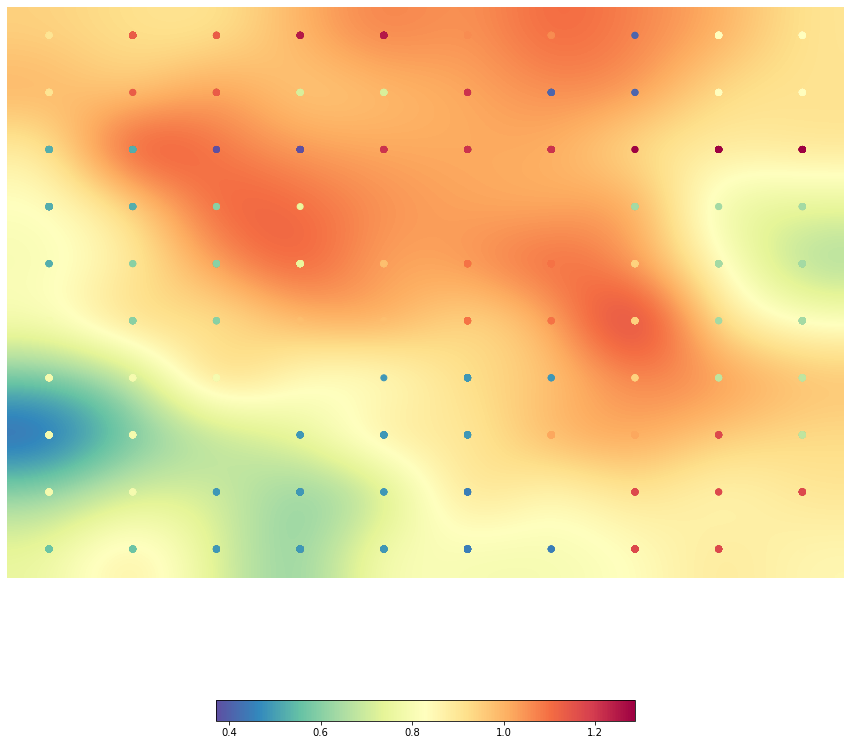

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(colorbar=True, bestmatches = True, figsize=(15, 15))

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώνουμε απευθείας τη μεταβλητή `clusters`.

In [ ]:
clusters = som.clusters
print(clusters)

[[14 20 20 23 23 18 18  1 12 12]
 [14 20 20  9  9 22  1  1 12 12]
 [ 4  4  0  0 22 22 22 24 24 24]
 [ 4  4  6 10 16 22 16  7  7  7]
 [ 4  6  6 10 16 19 19 15  7  7]
 [11  6  6 16 16 19 19 15  7  7]
 [11 11 11 11  3  3  3 15  8  8]
 [11 11 11  3  3  3 17 17 21  8]
 [11 11  3  3  3  2  2 21 21 21]
 [ 5  5  3  3  3  2  2 21 21 13]]


Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώνουμε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκουμε εύκολα τα μεγάλα και μικρά clusters.

In [ ]:
clusters_unique = np.unique(clusters, return_counts = True)

In [ ]:
clusters_sorted = np.argsort(clusters_unique[1])
print("Clusters sorted by increasing order of neurons:")
print("Clusters Index:\n ", clusters_sorted)
print("Number of neurons:\n ", clusters_unique[1][clusters_sorted])

Clusters sorted by increasing order of neurons:
Clusters Index:
  [13  0 18 17 14  5 23 10  9 15 24  1  8  2 19 20 12  6  4 16 22 21  7 11
  3]
Number of neurons:
  [ 1  2  2  2  2  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  6  7 10
 12]


Παρατηρούμε ότι υπάρχουν πολλές κόκκινες περιοχές όπου η μέση απόστασή τους από τους γειτονικούς κόμβους είναι πολύ μεγάλη και δεν είναι clusters αλλά σύνορα αυτών. Επομένως αυτό σημαίνει ότι θέλουμε πλέγμα μεγαλύτερου μεγέθους.


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters.

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Για το σκοπό αυτό ορίζουμε τις εξής συναρτήσεις:

* την print_categories_stats που επιστρέφει για ένα σύνολο ταινιών ομαδοποιημένες τις κατηγορίες των ταινιών,
* την συνάρτηση print_cluster_neurons_movies_report η οποία εμφανίζει για ένα cluster τους νευρώνες που ανήκουν σε αυτό
* την neuron_movies_report που με βοήθεια τις άλλες δυο τυπώνει τις πληθικότητες των κατηγοριών εντός ενός cluster.   

In [ ]:
def print_categories_stats(ids):
  total_categories=[]
  for id in ids:
    category=categories[id][0]
    category = category.split(',')
    for number_of_categs in category:
        number_of_categs = number_of_categs.strip(' ')
        number_of_categs = number_of_categs.strip('"')
        total_categories.append(number_of_categs)

  labels,counts = np.unique(total_categories, return_counts = True)
  cat_sorted = np.argsort(counts)
  cat_sorted = reversed(cat_sorted)
  res=[]
  for idx in cat_sorted:
    res.append((labels[idx],counts[idx]))
  print(res)
  return

In [ ]:
print_categories_stats([i for i in range(2000)])

[('Drama', 942), ('Comedy', 482), ('Romance Film', 331), ('Thriller', 307), ('Action', 286), ('World cinema', 239), ('Black-and-white', 182), ('Crime Fiction', 182), ('Action/Adventure', 178), ('Horror', 168), ('Indie', 156), ('Adventure', 155), ('Family Film', 149), ('Short Film', 148), ('Mystery', 125), ('Romantic drama', 121), ('Animation', 116), ('Musical', 110), ('Science Fiction', 95), ('Romantic comedy', 93), ('Fantasy', 84), ('War film', 83), ('Crime Thriller', 81), ('Comedy film', 79), ('Period piece', 72), ('Film adaptation', 71), ('Silent film', 65), ('Japanese Movies', 65), ('Psychological thriller', 64), ('Comedy-drama', 60), ('Documentary', 54), ('Western', 53), ('Bollywood', 53), ('Parody', 50), ('Chinese Movies', 48), ("Children's/Family", 42), ('Suspense', 39), ('Black comedy', 39), ('Teen', 35), ('Sports', 35), ('Television movie', 33), ('Biographical film', 33), ('Cult', 32), ('Martial Arts Film', 32), ('Family Drama', 32), ('Film noir', 31), ('Coming of age', 29), (

In [ ]:
def print_cluster_neurons_movies_report(cluster_index):
    col,row = np.where(som.clusters == cluster_index)
    array = np.column_stack((col,row))
    bmus_l = []
    for bmu in array:
     if bmu in bmus:
        bmus_l.append(bmu)
    return bmus_l

In [ ]:
print_cluster_neurons_movies_report(0)

[array([2, 2]), array([2, 3])]

In [ ]:
def neuron_movies_report(neurons):
    neuron_movies = []
    for id in neurons:
      arr = np.where(indices == int(id[0]) * n_rows + int(id[1]))
      for i in range(arr[0].shape[0]):
          neuron_movies.append(arr[0][i])
    print_categories_stats(neuron_movies)

In [ ]:
for i in range(25):
    print("Cluster ID {num}".format(num=i))
    neuron_movies_report(print_cluster_neurons_movies_report(i))

Cluster ID 0
[('Drama', 7), ('Romance Film', 7), ('Thriller', 4), ('Family Film', 3), ('Mystery', 3), ('Musical', 2), ('Adventure', 2), ('Family Drama', 2), ('Supernatural', 2), ('Music', 1), ("Children's", 1), ('Action/Adventure', 1), ('Animated Musical', 1), ('Animation', 1), ('Biography', 1), ('Biopic [feature]', 1), ("Children's/Family", 1), ('Martial Arts Film', 1), ('Christian film', 1), ('Comedy', 1), ('Sports', 1), ('Suspense', 1), ('Period piece', 1), ('Family-Oriented Adventure', 1), ('Action', 1)]
Cluster ID 1
[('Drama', 210), ('Short Film', 7), ('Musical', 6), ('Family Drama', 6), ('Melodrama', 5), ('Television movie', 5), ('Chinese Movies', 5), ('Romantic drama', 4), ('Coming of age', 3), ('Science Fiction', 3), ('Documentary', 3), ('Comedy-drama', 3), ('Music', 2), ('Domestic Comedy', 2), ('Fantasy', 2), ('Teen', 2), ('Marriage Drama', 2), ('Biopic [feature]', 2), ('Hip hop movies', 2), ('Prison', 2), ('Slice of life story', 2), ('Musical Drama', 2), ('Mockumentary', 1), 


##SOM και Clustering



Δοκιμάσαμε μεγέθη 20x20, 25x25 ή και 30x30.

### Διαστάσεις 20x20:


In [ ]:
n_rows, n_columns = 20, 20

In [ ]:
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data=reduced_data, epochs=100)

CPU times: user 3min 1s, sys: 474 ms, total: 3min 2s
Wall time: 1min 33s


In [ ]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

In [ ]:
print(ubmus)
print(indices)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 1  0]
 [ 1  2]
 [ 1  3]
 [ 1  5]
 [ 1  7]
 [ 1  8]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 1 19]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  7]
 [ 2  8]
 [ 2 10]
 [ 2 12]
 [ 2 14]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 2 18]
 [ 2 19]
 [ 3  0]
 [ 3  1]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 18]
 [ 3 19]
 [ 4  1]
 [ 4  3]
 [ 4  4]
 [ 4  5]
 [ 4  7]
 [ 4 12]
 [ 4 14]
 [ 4 17]
 [ 4 18]
 [ 4 19]
 [ 5  0]
 [ 5  2]
 [ 5  3]
 [ 5  4]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 5 11]
 [ 5 12]
 [ 5 13]
 [ 5 15]
 [ 5 16]
 [ 5 17]
 [ 5 19]
 [ 6  1]
 [ 6  2]
 [ 6  3]
 [ 6  4]
 [ 6  5]
 [ 6  7]
 [ 6  9]
 [ 6 10]
 [ 6 11]
 [ 6 12]
 [ 6 13]
 [ 6 14]
 [ 6 15]
 [ 6 16]
 [ 6 17]
 [ 6 18]
 [ 6 19]
 [ 7  0]
 [ 7  1]
 [ 7  3]
 

In [ ]:
n_cluster = 20
som.cluster(algorithm=KMeans(n_clusters=n_cluster))

In [ ]:
joblib.dump(som, 'som20x20.pkl')

['som20x20.pkl']

In [ ]:
som = joblib.load('som20x20.pkl')

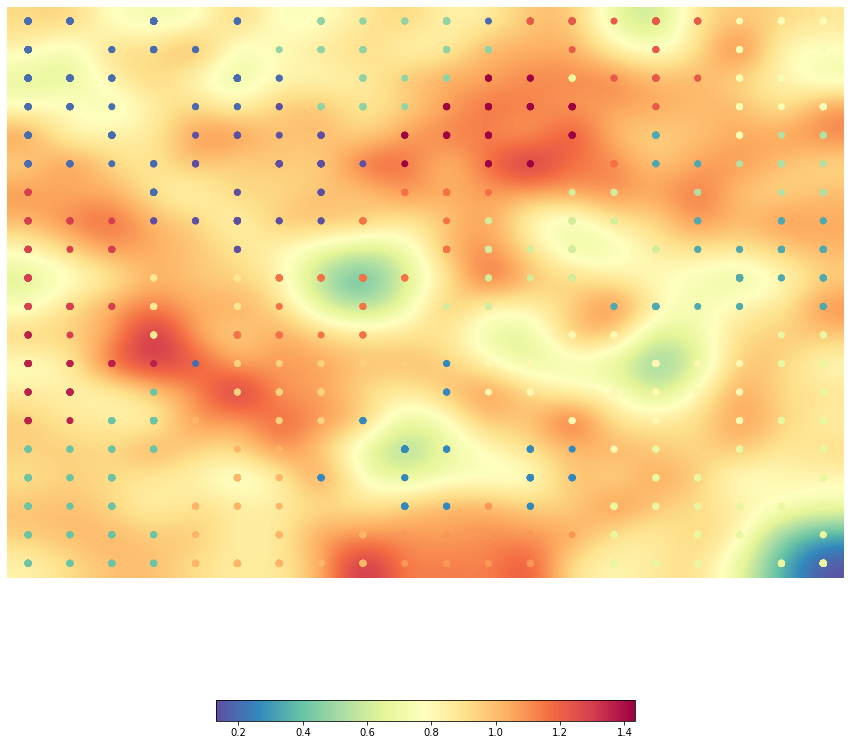

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(colorbar=True, bestmatches = True, figsize=(15, 15))

In [ ]:
clusters = som.clusters
print(clusters)

[[ 1  1  1  1  1  1  5  5  5  5  5  1 16 16 16 16 16  9  9  9]
 [ 1  1  1  1  1  1  5  5  5  5  5  5  1 16 16 16 16  9  9  9]
 [ 1  1  1  1  1  1  1  5  5  5  5 19 19  8 16 16 16  9  9  9]
 [ 1  1  1  1  1  1  0  5  5  5 19 19 19 19 16 16  9  9  9  9]
 [ 1  1  1  1  0  0  0  0  5 19 19 19 19 19  3  3  3  9  6  6]
 [ 1  1  1  1  0  0  0  0  0 19 19 19 19 15 15  3  3  6  6  6]
 [17 17  1  1  0  0  0  0 15 15 15 15  7  7  7  3  6  6  6  6]
 [17 17 17  0  0  0  0  0 15 15 15  7  7  7  7  7  3  3  3  3]
 [17 17 17 17  0  0 15 15 15 15 15  7  7  7  7  7  3  3  3  3]
 [17 17 17 11 11 11 15 15 15 15 15  7  7  7  7  3  3  3  3  3]
 [17 17 17 11 11 11 15 15 15 15  7  7  7  7  3  3  3  3  3  3]
 [18 17 17 11 11 15 15 15 15 15  7  7 10 10 10 10 10  3  8  8]
 [18 18 18 18  1 12 12 12 12 12  2 10 10 10 10 10 10 10  8  8]
 [18 18 18  4 13 12 12 12 12  2  2 10 10 10 10 10 10 10  8  8]
 [18 18  4  4 13 13 12 12  2  2  2  2  2 10 10 10 10 10  8  8]
 [ 4  4  4  4  4 13 13  2  2  2  2  2  2  2 10  8  8  8

In [ ]:
clusters_unique = np.unique(clusters, return_counts = True)
clusters_sorted = np.argsort(clusters_unique[1])
print("Clusters sorted by increasing order of neurons:")
print("Clusters Index:\n ", clusters_sorted)
print("Number of neurons:\n ", clusters_unique[1][clusters_sorted])

Clusters sorted by increasing order of neurons:
Clusters Index:
  [11  6 14 18 12  9 16 19 17  5  0 13  7  4 10  3  2 15  1  8]
Number of neurons:
  [ 8  9 10 10 11 14 14 15 17 19 21 22 23 24 25 26 26 28 38 40]


In [ ]:
for i in range(20):
    print("Cluster ID {num}".format(num=i))
    neuron_movies_report(print_cluster_neurons_movies_report(i))

Cluster ID 0
[('Action', 70), ('Short Film', 47), ('Animation', 43), ('Comedy', 33), ('Family Film', 33), ('Action/Adventure', 29), ('Thriller', 24), ('Adventure', 22), ('Parody', 18), ('Science Fiction', 14), ('Mystery', 7), ('Black-and-white', 7), ('Western', 7), ('Disaster', 6), ('Spy', 6), ('Crime Thriller', 5), ('Comedy film', 5), ('Indie', 5), ("Children's/Family", 5), ('Television movie', 5), ('Action Thrillers', 4), ('Swashbuckler films', 3), ('Musical', 3), ('War film', 3), ('Fantasy', 3), ('Costume Adventure', 2), ('Bollywood', 2), ('Doomsday film', 2), ('Drama', 2), ('Dystopia', 2), ('World cinema', 2), ('Satire', 2), ('Psychological thriller', 2), ('Horror', 2), ('Action Comedy', 1), ('Suspense', 1), ('Supernatural', 1), ('Superhero movie', 1), ('Airplanes and airports', 1), ('Slasher', 1), ('Stop motion', 1), ('Tamil cinema', 1), ('Anime', 1), ('Apocalyptic and post-apocalyptic fiction', 1), ('Sports', 1), ('Spaghetti Western', 1), ("Children's Entertainment", 1), ('Animat

### Διαστάσεις 25x25:


In [ ]:
n_rows, n_columns = 25, 25

In [ ]:
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data=reduced_data, epochs=100)

CPU times: user 4min 43s, sys: 697 ms, total: 4min 44s
Wall time: 2min 26s


In [ ]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

In [ ]:
print(ubmus)
print(indices)

[[ 0  0]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 0 20]
 [ 0 21]
 [ 0 23]
 [ 0 24]
 [ 1  0]
 [ 1  2]
 [ 1  4]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 17]
 [ 1 20]
 [ 1 24]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  6]
 [ 2  7]
 [ 2  9]
 [ 2 10]
 [ 2 11]
 [ 2 14]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 2 18]
 [ 2 19]
 [ 2 20]
 [ 2 22]
 [ 2 24]
 [ 3  0]
 [ 3  2]
 [ 3  3]
 [ 3  5]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 16]
 [ 3 18]
 [ 3 23]
 [ 4  0]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  5]
 [ 4  6]
 [ 4  8]
 [ 4 10]
 [ 4 11]
 [ 4 12]
 [ 4 13]
 [ 4 15]
 [ 4 16]
 [ 4 17]
 [ 4 20]
 [ 4 22]
 [ 4 23]
 [ 4 24]
 [ 5  0]
 [ 5  1]
 [ 5  2]
 [ 5  4]
 [ 5  5]
 [ 5  6]
 [ 5  8]
 [ 5  9]
 [ 5 12]
 [ 5 14]
 [ 5 15]
 [ 5 16]
 [ 5 18]
 [ 5 19]
 [ 5 20]
 [ 5 21]
 [ 5 22]
 [ 5 23]
 [ 5 24]
 [ 6  0]
 [ 6  2]
 [ 6  4]
 [ 6  6]
 [ 6  7]
 [ 6  9]
 [ 6 11]
 

In [ ]:
n_cluster = 25

In [ ]:
som.cluster(algorithm=KMeans(n_clusters=n_cluster))

In [ ]:
joblib.dump(som, 'som25x25.pkl')

['som25x25.pkl']

In [ ]:
som = joblib.load('som25x25.pkl')

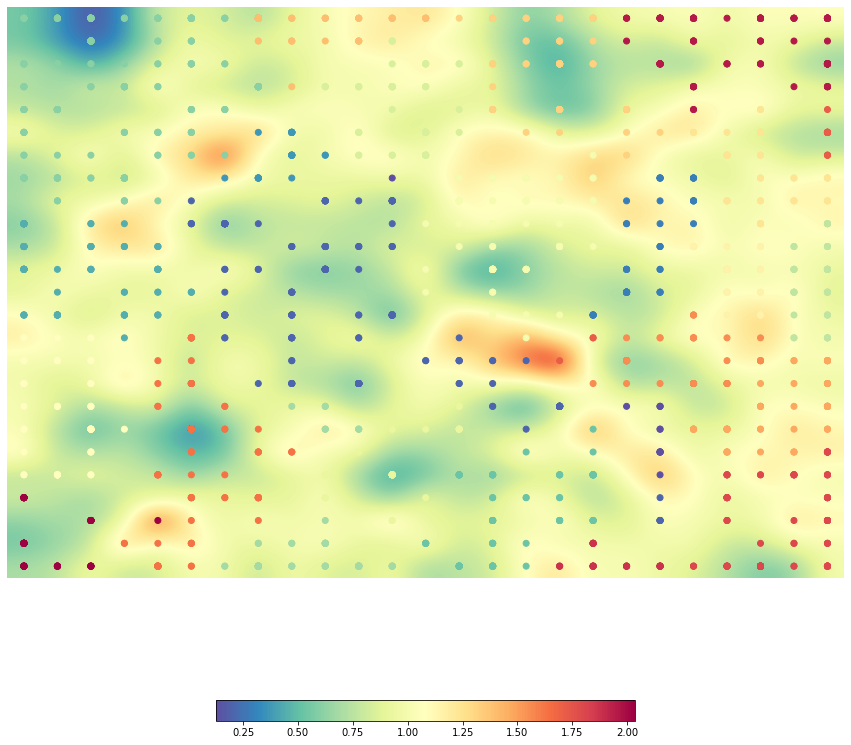

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(colorbar=True, bestmatches = True, figsize=(15, 15))

In [ ]:
clusters = som.clusters
print(clusters)

[[ 6  6  6  6  6  6  6 16 16 16 16 16 16 15 15 15 15 15 23 23 23 23 23 23
  23]
 [ 6  6  6  6  6  6  6 16 16 16 16  9  9 15 15 15 15 15 23 23 23 23 23 23
  23]
 [ 6  6  6  6  6  6  6  6 16 16  9  9  9  9 15 15 15 15 23 23 23 23 23 23
  23]
 [ 6  6  6  6  6  6  6  6 16  9  9  9  9  9 15 15 15 15 15 23 23 23 23 23
  23]
 [ 6  6  6  6  6  6  6  6  3  9  9  9  9  9 15 15 15 15 15 15 23 14 14 20
  20]
 [ 6  6  6  6  6  6  6  3  3  3  9  9  9  9 15 15 15 15 15 15 14 14 14 20
  20]
 [ 6  6  6  6  6  6  6  3  3  3  9  9  9  9 11 11 11 11 15  2 14 14 14 14
  20]
 [ 6  6  6  6  6  6  3  3  3  1  1  0  9 11 11 11 11 11  2  2  2 14 14 14
  14]
 [ 6  6  6  6  6  1  1  1  1  1  1  1  1 11 11 11 11 11  2  2  2 14 14 14
  14]
 [ 4  4  4  4  1  1  1  1  1  1  1  1 11 11 11 11 11 11  2  2  2 14 14 14
   8]
 [ 4  4  4  4  4  1  1  1  1  1  1  1  1 11 11 11 11 11  2  2 13 13 13  8
   8]
 [ 4  4  4  4  4  4  1  1  1  1  1  1 11 11 11 11 11  2  2  2 13 13 13  8
   8]
 [ 4  4  4  4  4  4  1  1  1  1  1  1 11

In [ ]:
clusters_unique = np.unique(clusters, return_counts = True)
clusters_sorted = np.argsort(clusters_unique[1])
print("Clusters sorted by increasing order of neurons:")
print("Clusters Index:\n ", clusters_sorted)
print("Number of neurons:\n ", clusters_unique[1][clusters_sorted])

Clusters sorted by increasing order of neurons:
Clusters Index:
  [22 20  0  3 13  8 16 24 17  7 18  2 14 10  9 21 12  4 23  5 15 11 19  6
  1]
Number of neurons:
  [ 8  8 10 10 11 11 13 15 17 18 19 20 20 22 25 25 26 27 28 32 32 39 43 63
 83]


In [ ]:
for i in range(25):
    print("Cluster ID {num}".format(num=i))
    neuron_movies_report(print_cluster_neurons_movies_report(i))

Cluster ID 0
[("Children's/Family", 2), ('Mockumentary', 1)]
Cluster ID 1
[('Action', 95), ('Thriller', 77), ('Drama', 76), ('Romance Film', 65), ('Action/Adventure', 59), ('Animation', 52), ('Comedy', 51), ('Crime Fiction', 49), ('Horror', 36), ('Mystery', 31), ('Science Fiction', 31), ('Psychological thriller', 28), ('World cinema', 28), ('Adventure', 26), ('Family Film', 26), ('Martial Arts Film', 20), ('Indie', 20), ('Crime Thriller', 20), ('Fantasy', 19), ('Short Film', 19), ('Chinese Movies', 16), ('Comedy film', 15), ('Black-and-white', 15), ('Suspense', 14), ('Spy', 13), ('Slasher', 12), ("Children's/Family", 9), ('Parody', 7), ('Japanese Movies', 7), ('Cult', 7), ('Crime Comedy', 7), ('Documentary', 6), ('Family-Oriented Adventure', 6), ('Heist', 5), ('Creature Film', 5), ('Culture & Society', 5), ('Romantic drama', 5), ('Silent film', 5), ('Superhero movie', 5), ('War film', 5), ('Film adaptation', 4), ('Film noir', 4), ('Action Thrillers', 4), ('Action Comedy', 4), ('Black c

### Διαστάσεις 30x30:


In [ ]:
n_rows, n_columns = 30, 30

In [ ]:
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data=reduced_data, epochs=100)

CPU times: user 6min 54s, sys: 1.01 s, total: 6min 55s
Wall time: 3min 32s


In [ ]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

In [ ]:
print(ubmus)
print(indices)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [29 27]
 [29 28]
 [29 29]]
[476 423 545 ... 132 278  50]


In [ ]:
n_cluster = 25

In [ ]:
from sklearn.cluster import KMeans
som.cluster(algorithm=KMeans(n_clusters=n_cluster))

In [ ]:
joblib.dump(som, 'som30x30.pkl')

['som30x30.pkl']

In [ ]:
som = joblib.load('som30x30.pkl')

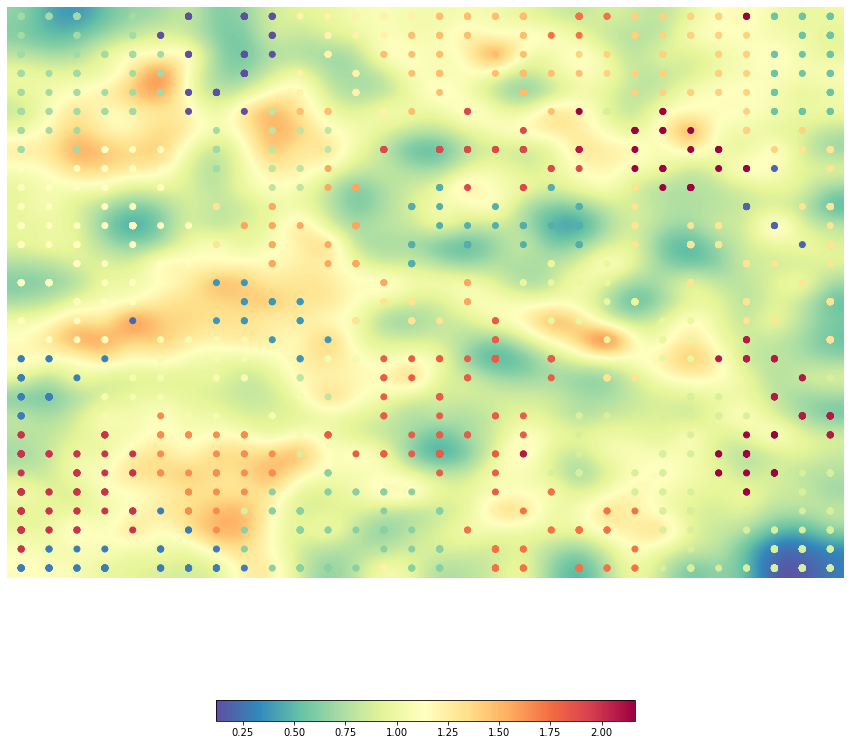

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(colorbar=True, bestmatches = True, figsize=(15, 15))

In [ ]:
clusters = som.clusters
print(clusters)

[[ 7  7  7  7  7  7  0  0  0  0 13 13 13 13 13 16 16 16 16 19 19 19 15 15
  15 15 24  5  5  5]
 [ 7  7  7  7  7  0  0  0  0  0 13 13 13 13 16 16 16 16 16 19 19 15 15 15
  15 15 15  5  5  5]
 [ 7  7  7  7  7  7  0  0  0  0 13 13 13 16 16 16 16 16 16 16 15 15 15 15
  15 15 15  5  5  5]
 [ 7  7  7  7  7  7  0  0  0  0 13 13 13 13 16 16 16 16 16 16 16 15 15 15
  15 15 15  5  5  5]
 [ 7  7  7  7  7  7  0  0  0 13 13 16 13 13 16 16 23 16 16 16 16 15 15 15
  15 15 15  5  5  5]
 [ 7  7  7  7  7  7  0  0  0  8 16 16 16 13 16 23 21 16 16 16 24  9 24 24
  15 15 15  5  5  5]
 [ 7  7  7  7  7  7  7  7  8  8  8  8  8 21 21 21 21 21 21 21 23 24 24 24
  24 15 15 15 15 14]
 [ 7  7  7 12 12 12  7  7  8  8  8  8 21 21 21 21 21 21 21 21 23 23 24 24
  24 24 15 15 14 14]
 [12 12 12 12 12 12  7  7  8  8  8 17 17 21 21 21 21 21 21 21 21 10 24 24
  24 24 24  1 14 14]
 [12 12 12 12 12 12  7  7  8  8  8 17 17 17  4  4 21  4 21  4  4 14 14 24
  24 24  1  1 14 14]
 [12 12 12 12 12 12 14 14 17 17 17 17 17  4  4  4 

In [ ]:
clusters_unique = np.unique(clusters, return_counts = True)
clusters_sorted = np.argsort(clusters_unique[1])
print("Clusters sorted by increasing order of neurons:")
print("Clusters Index:\n ", clusters_sorted)
print("Number of neurons:\n ", clusters_unique[1][clusters_sorted])

Clusters sorted by increasing order of neurons:
Clusters Index:
  [ 1  5  8  3  0 18 13 21 23 22 24 10  2 19 17  4 11 16 15  6  7 20 12  9
 14]
Number of neurons:
  [14 18 18 19 23 23 23 26 27 31 31 31 32 33 34 34 37 37 38 42 52 57 62 78
 80]


In [ ]:
for i in range(25):
    print("Cluster ID {num}".format(num=i))
    neuron_movies_report(print_cluster_neurons_movies_report(i))

Cluster ID 0
[('Horror', 28), ('Thriller', 22), ('Action', 18), ('Comedy', 18), ('Action/Adventure', 16), ('Adventure', 14), ('Science Fiction', 13), ('Cult', 10), ('B-movie', 10), ('Parody', 8), ('Monster movie', 5), ('Slasher', 5), ('Family Film', 4), ('Teen', 4), ('Western', 4), ('Horror Comedy', 4), ('Spy', 3), ('Black-and-white', 3), ('Chinese Movies', 3), ('Fantasy', 3), ('Martial Arts Film', 3), ('Indie', 3), ('Creature Film', 2), ('Family-Oriented Adventure', 2), ("Children's/Family", 2), ('Buddy film', 2), ('Wuxia', 2), ('Black comedy', 2), ('Japanese Movies', 2), ('Mythological Fantasy', 2), ('Slapstick', 2), ('Stoner film', 2), ('Supernatural', 2), ('Coming of age', 2), ('Computer Animation', 1), ('Biographical film', 1), ('Animal Picture', 1), ('Comedy Thriller', 1), ('Gross out', 1), ('Costume Adventure', 1), ('Crime Fiction', 1), ('Crime Thriller', 1), ('Fairy tale', 1), ('Fantasy Adventure', 1), ('World cinema', 1), ('Gross-out film', 1), ('Hybrid Western', 1), ('Screwba

Γενικά κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Για το σκοπό αυτό  δοκιμάσαμε  μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχα προσαρμόσαμε και το k του k means. Αυτό είναι λογικό γιατι οι μεγαλύτεροι χάρτες θα έχουν περισσότερους νευρώνες που θα πρέπει να ομαδοποιηθούν. Επίσης, όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν. Σχετικά με την επιλογή του k, μικρό k  δημιουργεί clusters που δείχνουν τις υπερομάδες ενώ μεγάλο k δημιουργεί clusters για κάθε υποομάδα. Συνεπώς, υπάρχει ένα trade off, και η επιλογή του εξαρτάται απο την εφαρμογή. Επίσης θέλουμε να έχουμε σε κοντινά clusters σημασιολογικά κοντινές ταινίες πχ θέλουμε το comedy thriller και action thriller να είναι κοντά ενώ επίσης θέλουμε το comedy thriller είναι μεταξύ των cluster των thriller και των ταινιών. Ιδανικά θέλουμε τα clusters comedy και drama να είναι αρκετά απομακρυσμένα μεταξύ τους καθώς δεν έχουν κοινή σημασιολογία. Έτσι καταληξαμε στο συμπερασμα οτι ο ιδανικός χάρτης είναι 30x30. Αυτός απεικονίζεται παρακάτω:

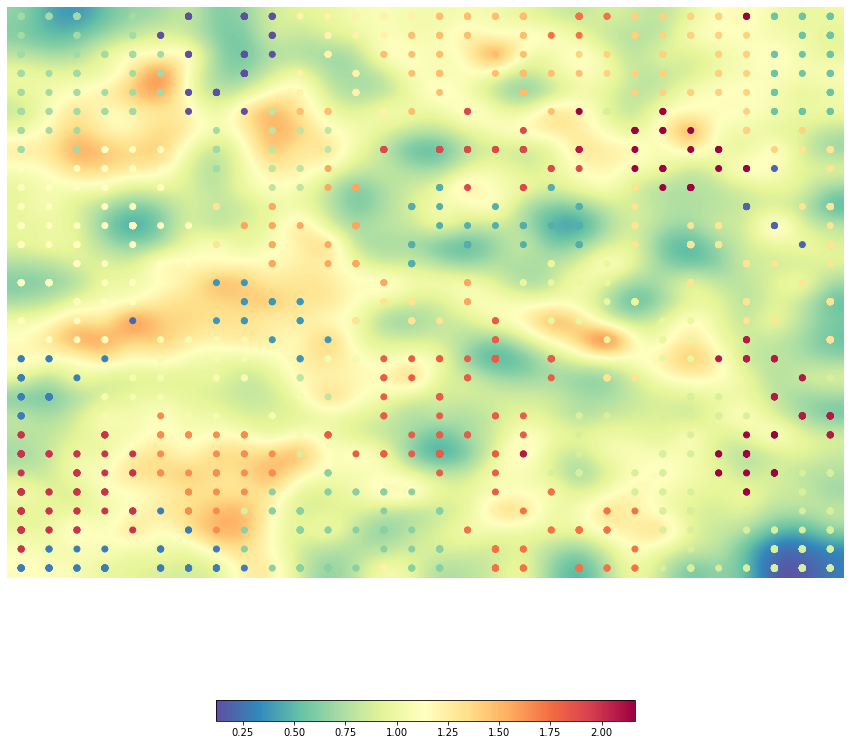

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(colorbar=True, bestmatches = True, figsize=(15, 15))



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook. Η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν είναι χάρτης SOM καιδεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας.

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM:

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.


Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


### Ανάλυση τοπολογικών ιδιοτήτων SOM

In [ ]:
som_rows = 30
som_columns = 30

In [ ]:
from collections import Counter
# Return occurences of categories for all movies in ids
def categories_stats(ids):
    cs = Counter()
    for m in ids:
        for c in (x.strip().strip('"') for x in categories[m][0].split(',')):
            cs[c] += 1
    return cs

In [ ]:
# Return movies mapped to neurons
def neuron_movies(neurons):
    ms = []
    for n in neurons:
        ms.extend(np.where(indices == n)[0])
    return ms

In [ ]:
def neurons_for_category(category):
    ns = []
    for n in range(som_rows * som_columns):
        if category in categories_stats(neuron_movies([n])):
            ns.append(n)
    print("Category",category,"was found in",len(ns), "neurons.")
    return ns

In [ ]:
movie_list_ids = list(range(5000))
print_categories_stats(movie_list_ids)
for category in ['Comedy','Drama','Action','Science Fiction','Musical','Black-and-white',"Family Drama","Bollywood","Computer Animation","Anti-war film"]:
    neurons_for_category(category)

[('Drama', 2311), ('Comedy', 1224), ('Thriller', 784), ('Romance Film', 780), ('Action', 734), ('World cinema', 620), ('Crime Fiction', 486), ('Horror', 472), ('Action/Adventure', 441), ('Black-and-white', 439), ('Indie', 402), ('Adventure', 391), ('Short Film', 382), ('Family Film', 360), ('Romantic drama', 290), ('Mystery', 287), ('Animation', 279), ('Musical', 277), ('Science Fiction', 250), ('Romantic comedy', 228), ('Crime Thriller', 226), ('Fantasy', 214), ('Comedy film', 209), ('War film', 190), ('Period piece', 161), ('Silent film', 157), ('Film adaptation', 152), ('Comedy-drama', 145), ('Japanese Movies', 144), ('Chinese Movies', 139), ('Documentary', 135), ('Bollywood', 132), ('Psychological thriller', 131), ('Western', 130), ('Martial Arts Film', 102), ('Parody', 100), ('Black comedy', 98), ("Children's/Family", 97), ('Teen', 93), ('Suspense', 90), ('Sports', 89), ('Television movie', 85), ('Family Drama', 85), ('Cult', 81), ('Coming of age', 79), ('Biographical film', 78), 

Από τα παραπάνω παρατηρούμε ότι οι πιο συχνές κατηγορίες ταινιών είναι οι "Drama" και "Comedy". Κατασκευάσαμε τη συνάρτηση `neurons_for_category` και παρατηρούμε ότι αυτές απεικονίζονται σε ένα μεγάλο ποσοστό των νευρώνων του SOM. Συγκεκριμένα 257 για το "Drama" και 157 για το "Comedy". Από την άλλη κατηγορίες όπως το "Anti-war film" ή το "Computer Animation" απεικονίζονται σε ένα μικρότερο ποσοστό νευρώνων. Γενικά παρατηρούμε ότι καθώς μειώνεται ο αριθμός ταινιών της κάθε κατηγορίας μειώνονται και οι νευρώνες στους οποίους κυριαρχεί.

Παρατηρώντας τον χάρτη βλέπουμε ότι το main body και η διαγώνιος του σχετίζεται με ταινίες κυρίως τύπου Drama και κατηγορίες που εντάσσονται στο Drama, αφού μπορούμε να δούμε clusters όπως το 17,3,21,14. Έτσι το Drama καθιστάται ως το πιο διάσημο είδος ταινίας στο dataset μας.

Στο πανω αριστερά μέρος του χάρτη βλεπουμε το cluster 7 που έχει ταινίες τύπου Comedy και Family. Στο κάτω δεξία τμήμα κυριαρχεί το cluster 9 με ταινίες τύπου  Teen

### Μακρινά Πρότυπα Εισόδου

In [ ]:
## left upper corner
neuron_movies_report(print_cluster_neurons_movies_report(7))

[('Comedy', 105), ('Family Film', 37), ('Action', 29), ('Black-and-white', 28), ('Action/Adventure', 25), ('Drama', 24), ('Adventure', 22), ('World cinema', 19), ('Parody', 19), ('Romance Film', 17), ('Musical', 15), ('Animation', 14), ('Thriller', 13), ('Indie', 13), ('Short Film', 12), ('Chinese Movies', 11), ('Horror', 11), ('Martial Arts Film', 11), ('Fantasy', 10), ('Mystery', 10), ('Crime Fiction', 9), ('War film', 9), ('Satire', 7), ('Science Fiction', 7), ('Slapstick', 6), ('Period piece', 5), ('Japanese Movies', 5), ('Western', 5), ('Sports', 5), ('Film adaptation', 5), ("Children's/Family", 5), ('Screwball comedy', 4), ('Crime Thriller', 4), ('Romantic comedy', 4), ('Psychological thriller', 4), ('Mockumentary', 3), ('Political satire', 3), ('Television movie', 3), ('Buddy film', 3), ('Cult', 2), ('Gangster Film', 2), ('Comedy-drama', 2), ('Detective', 2), ('Detective fiction', 2), ('Comedy film', 2), ('Epic', 2), ('Comedy of Errors', 2), ('Haunted House Film', 2), ('Domestic

In [ ]:
## right down corner
neuron_movies_report(print_cluster_neurons_movies_report(9))


[('Teen', 1), ('Romance Film', 1), ('Musical', 1), ('Family Film', 1), ('Comedy', 1)]


In [ ]:
# right
neuron_movies_report(print_cluster_neurons_movies_report(23))

[('Thriller', 17), ('Crime Thriller', 17), ('Crime Fiction', 15), ('Drama', 10), ('Mystery', 9), ('Suspense', 7), ('Comedy', 7), ('Romance Film', 5), ('Detective', 4), ('Film noir', 4), ('Family Film', 3), ('Detective fiction', 3), ('World cinema', 3), ('Black-and-white', 3), ('War film', 3), ("Children's/Family", 2), ('Adventure', 2), ('Film adaptation', 2), ('Gangster Film', 2), ('Action', 2), ('Period piece', 2), ('Short Film', 2), ('Romantic drama', 1), ('Action/Adventure', 1), ('Tragicomedy', 1), ('Animation', 1), ('Television movie', 1), ('Buddy film', 1), ('Supernatural', 1), ('Comedy-drama', 1), ('Historical fiction', 1), ('Western', 1), ('Psychological thriller', 1), ('Mockumentary', 1), ('Erotic thriller', 1), ('Japanese Movies', 1), ('Fantasy', 1), ('Indie', 1), ('Horror', 1), ('Revisionist Western', 1)]


Μακρινά πρότυπα εισόδου τείνουν πράγματι να απεικονίζονται σε απομακρυσμένες θέσεις στον χάρτη, ενώ κοντινά σημασιολογικά πρότυπα απεικονίζονται σε γειτονικές περιοχές. Για παράδειγμα, παρατηρούμε ότι στο πάνω αριστερά κομμάτι του χάρτη, βρίσκεται κύριως το cluster 7. Γενικά στο cluster αυτό κυριαρχεί το είδος Comedy, και απαρτίζεται και από άλλα είδη όπως Family Film, Action.  Στην κάτω δεξιά γωνία, βρίσκονται τo cluster με αριθμ;o 9 που αντιστοιχεί σε κατηγορίες  Teen, Romance Film, Musical, Family Film. Επομένως, συμπεραίνουμε ότι οι ταινίες με θέμα Comedy τοποθετήθηκαν σε κοντινές θέσεις στον χάρτη, όπως και οι ταινίες τύπου Teen. Στο δεξί μέρος του χάρτη υπάρχει και το cluster 23 που απαρτίζεται κυρίως απο Thriller ταινίες. Προφανώς το Comedy και το Thriller είναι δύο κατηγορίες πολύ διαφορετικές μεταξύ τους και τοποθετήθηκαν σε διαφορετικές γωνίες του χάρτη. Έτσι επιβεβαιώνουμε πειραματικά ότι ο SOM τείνει να βάζει διαφορετικά προτυπα τοπολογικά μακριά

### Κοντινά Πρότυπα Εισόδου

In [ ]:
## upper
neuron_movies_report(print_cluster_neurons_movies_report(5))
neuron_movies_report(print_cluster_neurons_movies_report(15))

[('Comedy', 32), ('Action/Adventure', 24), ('Horror', 15), ('Action', 13), ('Thriller', 11), ('Adventure', 11), ('Romance Film', 10), ('Supernatural', 9), ('Crime Fiction', 7), ('Crime Comedy', 7), ('Western', 7), ('Drama', 6), ('World cinema', 5), ('Heist', 5), ('Action Thrillers', 4), ('Film adaptation', 3), ('War film', 3), ('Family Film', 3), ('Teen', 3), ('Television movie', 2), ('Revisionist Western', 2), ('Road movie', 2), ('Action Comedy', 2), ('Gangster Film', 2), ('Chinese Movies', 2), ('Cult', 2), ('Costume drama', 1), ('Comedy film', 1), ('Creature Film', 1), ('Comedy-drama', 1), ('Caper story', 1), ('Buddy film', 1), ('Black-and-white', 1), ('Biopic [feature]', 1), ('Biography', 1), ('Biographical film', 1), ('Black comedy', 1), ('Zombie Film', 1), ('Crime Thriller', 1), ('Music', 1), ('Swashbuckler films', 1), ('Surrealism', 1), ('Spy', 1), ('Screwball comedy', 1), ('Science Fiction', 1), ('Romantic comedy', 1), ('Religious Film', 1), ('Indie', 1), ('Docudrama', 1), ('Ind

In [ ]:
## main body
neuron_movies_report(print_cluster_neurons_movies_report(17))
neuron_movies_report(print_cluster_neurons_movies_report(3))
neuron_movies_report(print_cluster_neurons_movies_report(21))
neuron_movies_report(print_cluster_neurons_movies_report(14))

[('Drama', 109), ('World cinema', 51), ('Comedy', 46), ('Thriller', 28), ('Musical', 20), ('Bollywood', 19), ('Period piece', 17), ('Romance Film', 16), ('Romantic drama', 12), ('Comedy-drama', 11), ('Animation', 10), ('Action', 9), ('Family Film', 8), ('Film adaptation', 7), ('Biographical film', 7), ('Indie', 7), ('Black-and-white', 7), ('Fantasy', 7), ('Sports', 6), ('Crime Fiction', 6), ('Biopic [feature]', 5), ('Black comedy', 5), ('Art film', 5), ('Mystery', 5), ('Family Drama', 5), ('Science Fiction', 5), ('Biography', 4), ('Political drama', 4), ('History', 4), ('Parody', 4), ('Coming of age', 4), ('Melodrama', 4), ('Japanese Movies', 4), ('Docudrama', 3), ('Horror', 3), ('War film', 3), ('Adventure', 3), ('Existentialism', 2), ('Crime Thriller', 2), ('Costume drama', 2), ('Filipino Movies', 2), ('Television movie', 2), ('Childhood Drama', 2), ('Teen', 2), ('Silent film', 2), ('Feminist Film', 2), ('Satire', 2), ('Medical fiction', 2), ('Road movie', 2), ('Spy', 2), ('Psycholog

Γενικά βλέπουμε κοντινά πρότυπα σε κοντινές περιοχές σχεδόν παντού στον χάρτη. Πιο αναλυτικά στο πάνω μέρος του χάρτη έχουμε τις ταινίες που ανήκουν στην κλάση Action, Comedy κυρίως στα clusters 5 και 15, στην κάτω αριστερρή περιοχή βρίσκουμε στο cluster 2 την κατηγορία Japanese Movies και στο main body του βρίσκουμε τα clusters 17, 3, 21, 14 που σχετίζεται με ταινίες κυρίως τύπου Drama, World Cinema. Γενικά επιβεβαίωνεται ότι κοντινές τοπολογικά κατηγορίες στο SOM είναι και κοντινές νοηματικά.

### Ανάλυση των Clusters

Παρακάτω θα αναλύσουμε μερικές περιπτώσεις clusters που έχουν καλή και κακή συμπεριφορά. Συγκεκριμένα έχουμε:

* Το cluster 5 έχει κακή συμπεριφορά, ενώνει πολλά ήδη ταινιών που δεν σχετίζονται συνεκτικά μεταξύ τους (Comedy, Horror)

In [ ]:
print("Cluster ID {num}".format(num=5))
neuron_movies_report(print_cluster_neurons_movies_report(5))

Cluster ID 5
[('Comedy', 32), ('Action/Adventure', 24), ('Horror', 15), ('Action', 13), ('Thriller', 11), ('Adventure', 11), ('Romance Film', 10), ('Supernatural', 9), ('Crime Fiction', 7), ('Crime Comedy', 7), ('Western', 7), ('Drama', 6), ('World cinema', 5), ('Heist', 5), ('Action Thrillers', 4), ('Film adaptation', 3), ('War film', 3), ('Family Film', 3), ('Teen', 3), ('Television movie', 2), ('Revisionist Western', 2), ('Road movie', 2), ('Action Comedy', 2), ('Gangster Film', 2), ('Chinese Movies', 2), ('Cult', 2), ('Costume drama', 1), ('Comedy film', 1), ('Creature Film', 1), ('Comedy-drama', 1), ('Caper story', 1), ('Buddy film', 1), ('Black-and-white', 1), ('Biopic [feature]', 1), ('Biography', 1), ('Biographical film', 1), ('Black comedy', 1), ('Zombie Film', 1), ('Crime Thriller', 1), ('Music', 1), ('Swashbuckler films', 1), ('Surrealism', 1), ('Spy', 1), ('Screwball comedy', 1), ('Science Fiction', 1), ('Romantic comedy', 1), ('Religious Film', 1), ('Indie', 1), ('Docudram

* Το cluster 9, επίσης, δεν είναι αρκετά αντιπροσωπευτικό, καθώς περιέχει μικρό αριθμό απο κατηγορίες

In [ ]:
print("Cluster ID {num}".format(num=9))
neuron_movies_report(print_cluster_neurons_movies_report(9))

Cluster ID 9
[('Teen', 1), ('Romance Film', 1), ('Musical', 1), ('Family Film', 1), ('Comedy', 1)]


* Από την άλλη clusters όπως το 15 έχουν πολύ καλή ομαδοποίηση με κυρίαρχη την κατηγορία Action Movies.

In [ ]:
print("Cluster ID {num}".format(num=15))
neuron_movies_report(print_cluster_neurons_movies_report(15))

Cluster ID 15
[('Action', 53), ('Action/Adventure', 44), ('Thriller', 34), ('Drama', 29), ('Adventure', 28), ('Comedy', 19), ('Crime Fiction', 17), ('Science Fiction', 15), ('Indie', 14), ('Romance Film', 11), ('Horror', 9), ('Disaster', 9), ('Family Film', 8), ('War film', 8), ('World cinema', 7), ('Fantasy', 7), ('Black-and-white', 6), ('Cult', 6), ('Satire', 6), ('Black comedy', 5), ("Children's/Family", 5), ('Television movie', 5), ('Parody', 5), ('Western', 5), ('Crime Thriller', 5), ('Romantic comedy', 5), ('Film adaptation', 4), ('Psychological thriller', 4), ('Romantic drama', 4), ('Martial Arts Film', 4), ('Creature Film', 3), ('Chinese Movies', 3), ("Children's Fantasy", 3), ('Fantasy Adventure', 3), ('Action Thrillers', 3), ('Crime Drama', 3), ('Absurdism', 3), ('Teen', 3), ('Suspense', 3), ('Period piece', 3), ('Sports', 2), ('Ensemble Film', 2), ('Swashbuckler films', 2), ('Adventure Comedy', 2), ('Supernatural', 2), ('Superhero movie', 2), ('Bollywood', 2), ('Spy', 2), ('

* Επισης καλή ομαδοποίηση έχει και το cluster 17 με γενικά Δραματικές Ταινίες

In [ ]:
print("Cluster ID {num}".format(num=21))
neuron_movies_report(print_cluster_neurons_movies_report(21))

Cluster ID 21
[('Drama', 59), ('Romance Film', 52), ('Comedy', 41), ('Romantic drama', 35), ('Family Film', 25), ('Romantic comedy', 20), ('Animation', 17), ('Indie', 16), ('Film adaptation', 16), ('Period piece', 10), ('World cinema', 9), ("Children's/Family", 9), ('Black-and-white', 8), ('Adventure', 8), ('Comedy-drama', 7), ('Fantasy', 7), ('Musical', 6), ("Children's", 6), ('Family-Oriented Adventure', 5), ('Short Film', 5), ('Action/Adventure', 4), ('Action', 4), ('Marriage Drama', 3), ('Japanese Movies', 3), ('Coming of age', 3), ('Crime Fiction', 3), ('Ensemble Film', 3), ('Musical Drama', 2), ('Anime', 2), ('Superhero movie', 2), ('Slapstick', 2), ('Computer Animation', 2), ("Children's Fantasy", 2), ('Dance', 2), ('Family Drama', 2), ('Comedy film', 2), ('Teen', 2), ('Animal Picture', 2), ('Mystery', 2), ('Melodrama', 2), ('Christian film', 1), ('Biography', 1), ('Animated cartoon', 1), ('Biopic [feature]', 1), ('Sword and sorcery films', 1), ('Animated Musical', 1), ('Sword a

Τέλος ένα μικρό cluster με εξαιρετικό ενδιαφέρον φαίνεται πως είναι το cluster 17. Αυτό φαίνεται να έχει συγκεντρώσει διαφορετικές κατηγορίες πέρα τον δημοφιλών Drama-Thriller-Comedy, και θα λέγαμε πως αντιπροσωπεύει μια κατηγορία με πιο ταίνιες του παγκόσμιου κινηματογράφου (World Cinema, Bollywood).

In [ ]:
print("Cluster ID {num}".format(num=17))
neuron_movies_report(print_cluster_neurons_movies_report(17))

Cluster ID 17
[('Drama', 109), ('World cinema', 51), ('Comedy', 46), ('Thriller', 28), ('Musical', 20), ('Bollywood', 19), ('Period piece', 17), ('Romance Film', 16), ('Romantic drama', 12), ('Comedy-drama', 11), ('Animation', 10), ('Action', 9), ('Family Film', 8), ('Film adaptation', 7), ('Biographical film', 7), ('Indie', 7), ('Black-and-white', 7), ('Fantasy', 7), ('Sports', 6), ('Crime Fiction', 6), ('Biopic [feature]', 5), ('Black comedy', 5), ('Art film', 5), ('Mystery', 5), ('Family Drama', 5), ('Science Fiction', 5), ('Biography', 4), ('Political drama', 4), ('History', 4), ('Parody', 4), ('Coming of age', 4), ('Melodrama', 4), ('Japanese Movies', 4), ('Docudrama', 3), ('Horror', 3), ('War film', 3), ('Adventure', 3), ('Existentialism', 2), ('Crime Thriller', 2), ('Costume drama', 2), ('Filipino Movies', 2), ('Television movie', 2), ('Childhood Drama', 2), ('Teen', 2), ('Silent film', 2), ('Feminist Film', 2), ('Satire', 2), ('Medical fiction', 2), ('Road movie', 2), ('Spy', 2


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο helios το παρόν notebook επεξεργασμένο ή ένα ή δύο νέα zipαρισμένα με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών.
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας.
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα</font>
</td>
  </tr>
</table>